In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
import requests
import base64
from elasticsearch import Elasticsearch
from urllib import parse
import pandas as pd
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import logging
logging.basicConfig(level=logging.CRITICAL)

from code_utils.elastic import get_data_from_elastic,plot_graph,interfaces_evaluation
from code_utils.utils import get_year_ipbes,get_year_ipcc,aplatir

Visualization of the contribution of each countries in ipcc publications - all wgs

In [8]:
df=pd.read_json('c:\\Users\\haallat\\Documents\\teds\\notebooks\\bso_ipcc_ipbes_elastic_update_OA2.jsonl', lines=True)

In [9]:
df_ipcc=df[pd.isna(df.ipcc)==False]

In [10]:
df_ipcc

,doi,year,ipcc,rors,topics,authors_name,countries,french_labs,french_tutelles,ipbes
0,10.1001/jama.2012.108940,2012.0,"[{'name': 'wg2_chap_06', 'wg': 'wg2', 'chap': ...","[[https://ror.org/05cf8a891, US], [https://ror...","[Disaster Response and Management, Disaster Ma...","[[Tia Powell, [US]], [Dan Hanfling, [US]], [La...",[USA],[],[],NaN
1,10.1001/jama.2014.13186,2014.0,"[{'name': 'wg2_chap_07', 'wg': 'wg2', 'chap': ...","[[https://ror.org/03e3qgk42, US], [https://ror...","[Climate Change and Health Impacts, Air Qualit...","[[Jonathan A. Patz, [US]], [Howard Frumkin, [U...","[GBR, USA]",[],[],NaN
2,10.1001/jama.2014.15715,2014.0,"[{'name': 'wg2_chap_07', 'wg': 'wg2', 'chap': ...","[[https://ror.org/03vek6s52, US], [https://ror...","[Climate Change and Health Impacts, Thermoregu...","[[Jennifer F. Bobb, [US]], [Ziad Obermeyer, [U...",[USA],[],[],NaN
3,10.1001/jama.2020.1097,2020.0,"[{'name': 'wg2_chap_07', 'wg': 'wg2', 'chap': ...","[[https://ror.org/05vzafd60, US], [https://ror...","[COVID-19 epidemiological studies, COVID-19 Pa...","[[Alexandra Phelan, [US]], [Rebecca Katz, [US]...",[USA],[],[],NaN
4,10.1001/jama.2020.15398,2020.0,"[{'name': 'wg2_chap_04', 'wg': 'wg2', 'chap': ...","[[https://ror.org/02dgjyy92, US], [https://ror...","[Tropical and Extratropical Cyclones Research,...","[[James M. Shultz, [US]], [Craig Fugate, [US]]...",[USA],[],[],NaN
...,...,...,...,...,...,...,...,...,...,...
48911,10.9745/ghsp-d-15-00374,2016.0,"[{'name': 'wg2_chap_18', 'wg': 'wg2', 'chap': ...","[[https://ror.org/01n6e6j62, US], [https://ror...","[Global Maternal and Child Health, Global Heal...","[[Ellen H. Starbird, [US]], [Maureen Norton, [...",[USA],[],[],NaN
48912,10.9753/icce.v34.management.39,2014.0,"[{'name': 'wg1_chap_12', 'wg': 'wg1', 'chap': ...","[[https://ror.org/03zbnzt98, US], [https://ror...","[Tropical and Extratropical Cyclones Research,...","[[Jennifer Wehof, [US]], [Jon K. Miller, []], ...",[USA],[],[],NaN
48913,10.9753/icce.v36.risk.59,2018.0,"[{'name': 'wg2_chap_16', 'wg': 'wg2', 'chap': ...","[[https://ror.org/00ntfnx83, JP], [https://ror...","[Geophysics and Gravity Measurements, Coastal ...","[[Miguel Esteban, [GB, JP]], [Hiroshi Takagi, ...","[GBR, JPN]",[],[],NaN
48914,10.9770/jesi.2017.4.4(13),2017.0,"[{'name': 'wg2_chap_18', 'wg': 'wg2', 'chap': ...","[[https://ror.org/006ks2460, HR], [https://ror...",[Sustainable Development and Environmental Pol...,"[[Saša Stjepanović, [HR]], [Daniel Tomić, [HR]...",[HRV],[],[],NaN


In [72]:
df.columns

Index(['doi', 'year', 'title', 'rors', 'ipcc', 'authors_name',
       'institutions_names', 'countries', 'topics', 'labs', 'french_labs',
       'rnsr', 'tutelles_label_rnsr', 'tutelles_label_ror', 'tutelles',
       'french_tutelles', 'ipbes'],
      dtype='object')

In [70]:
len(df[pd.isna(df.ipcc)==False])

48916

In [11]:
len(df[pd.isna(df.ipcc)==False].drop_duplicates('doi'))

48916

In [71]:
pd.Series(aplatir(list(df_ipcc.countries.dropna()))).value_counts()[:10]

USA    19509
GBR    10498
DEU     6607
AUS     6091
CAN     4258
FRA     4049
CHN     3961
NLD     3709
CHE     2702
ITA     2609
Name: count, dtype: int64

C:\Users\haallat\AppData\Local\Temp\ipykernel_2576\3745237211.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


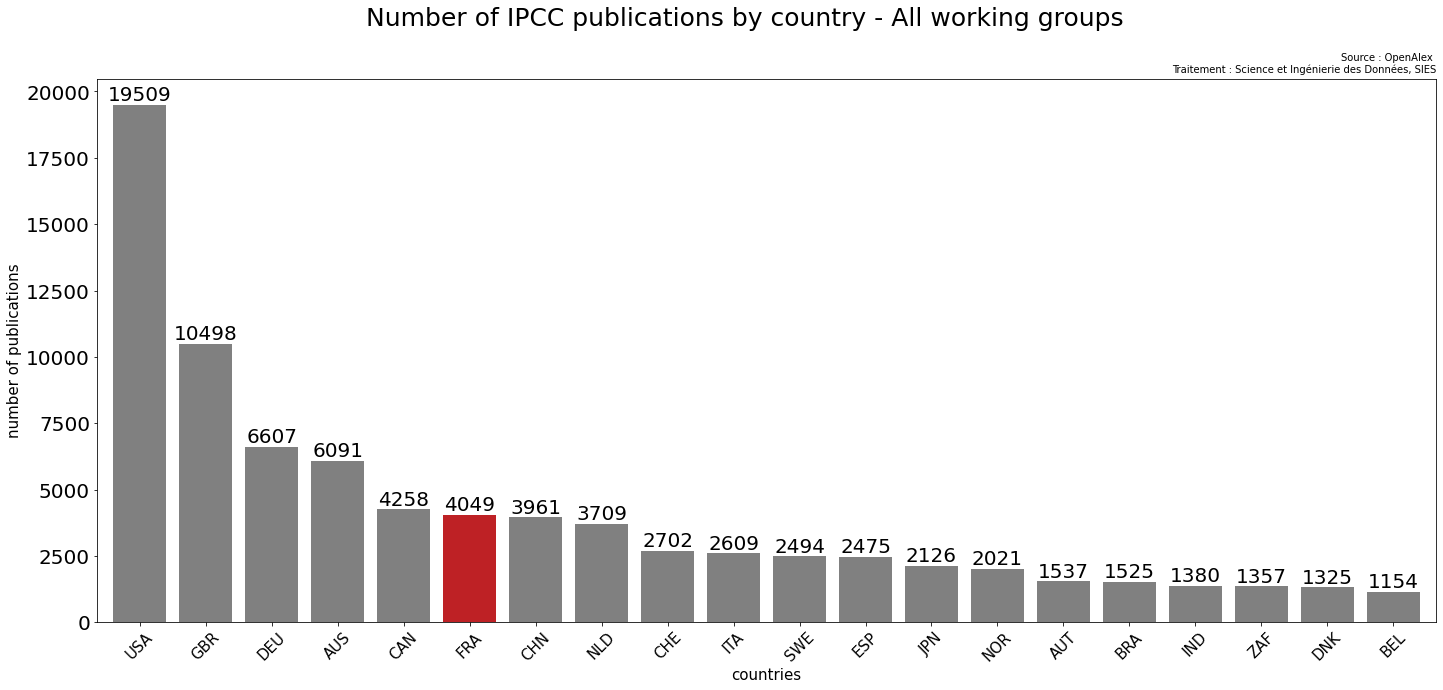

In [55]:
import matplotlib.pyplot as plt

data_counts=pd.Series(aplatir(list(df_ipcc.countries.dropna()))).value_counts()
plt.figure(figsize=(24, 10))
color_dict = {'FRA': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Number of IPCC publications by country - All working groups", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

In [56]:
data_counts1=pd.Series(aplatir(list(df_ipcc.countries.dropna()))).value_counts()
tot=len(df_ipcc.doi.dropna())

data_counts = (data_counts1 / tot) * 100

In [57]:
tot

48916

In [58]:
df_ipcc.doi.dropna()

0              10.1001/jama.2012.108940
1               10.1001/jama.2014.13186
2               10.1001/jama.2014.15715
3                10.1001/jama.2020.1097
4               10.1001/jama.2020.15398
                      ...              
53165           10.9745/ghsp-d-15-00374
53166    10.9753/icce.v34.management.39
53167          10.9753/icce.v36.risk.59
53170         10.9770/jesi.2017.4.4(13)
53171            10.9778/cmajo.20170047
Name: doi, Length: 48916, dtype: object

C:\Users\haallat\AppData\Local\Temp\ipykernel_2576\53162444.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)


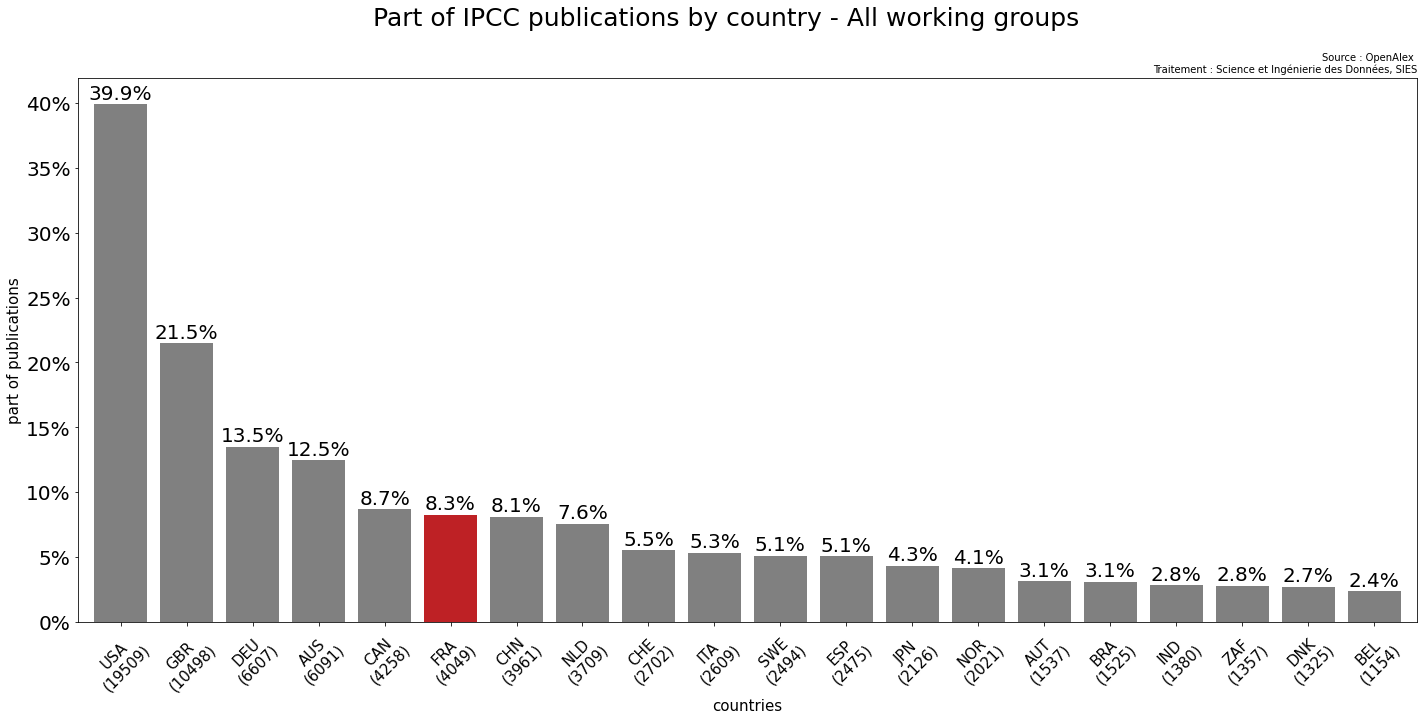

In [59]:
import matplotlib.pyplot as plt

data_counts1=pd.Series(aplatir(list(df_ipcc.countries.dropna()))).value_counts()
tot=len(df_ipcc.doi.dropna())

data_counts = (data_counts1 / tot) * 100

plt.figure(figsize=(24, 10))
color_dict = {'FRA': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)
for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Part of IPCC publications by country - All working groups", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)
x_labels = [f"{data_counts.index[:20][i]}\n({list(data_counts1.to_dict().values())[i]})" for i in range(0,20)]
ax.set_xticklabels(x_labels, rotation=45, fontsize=15)
ax.set_ylabel(f'part of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

Pour chaque Working groups

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\2097087550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)


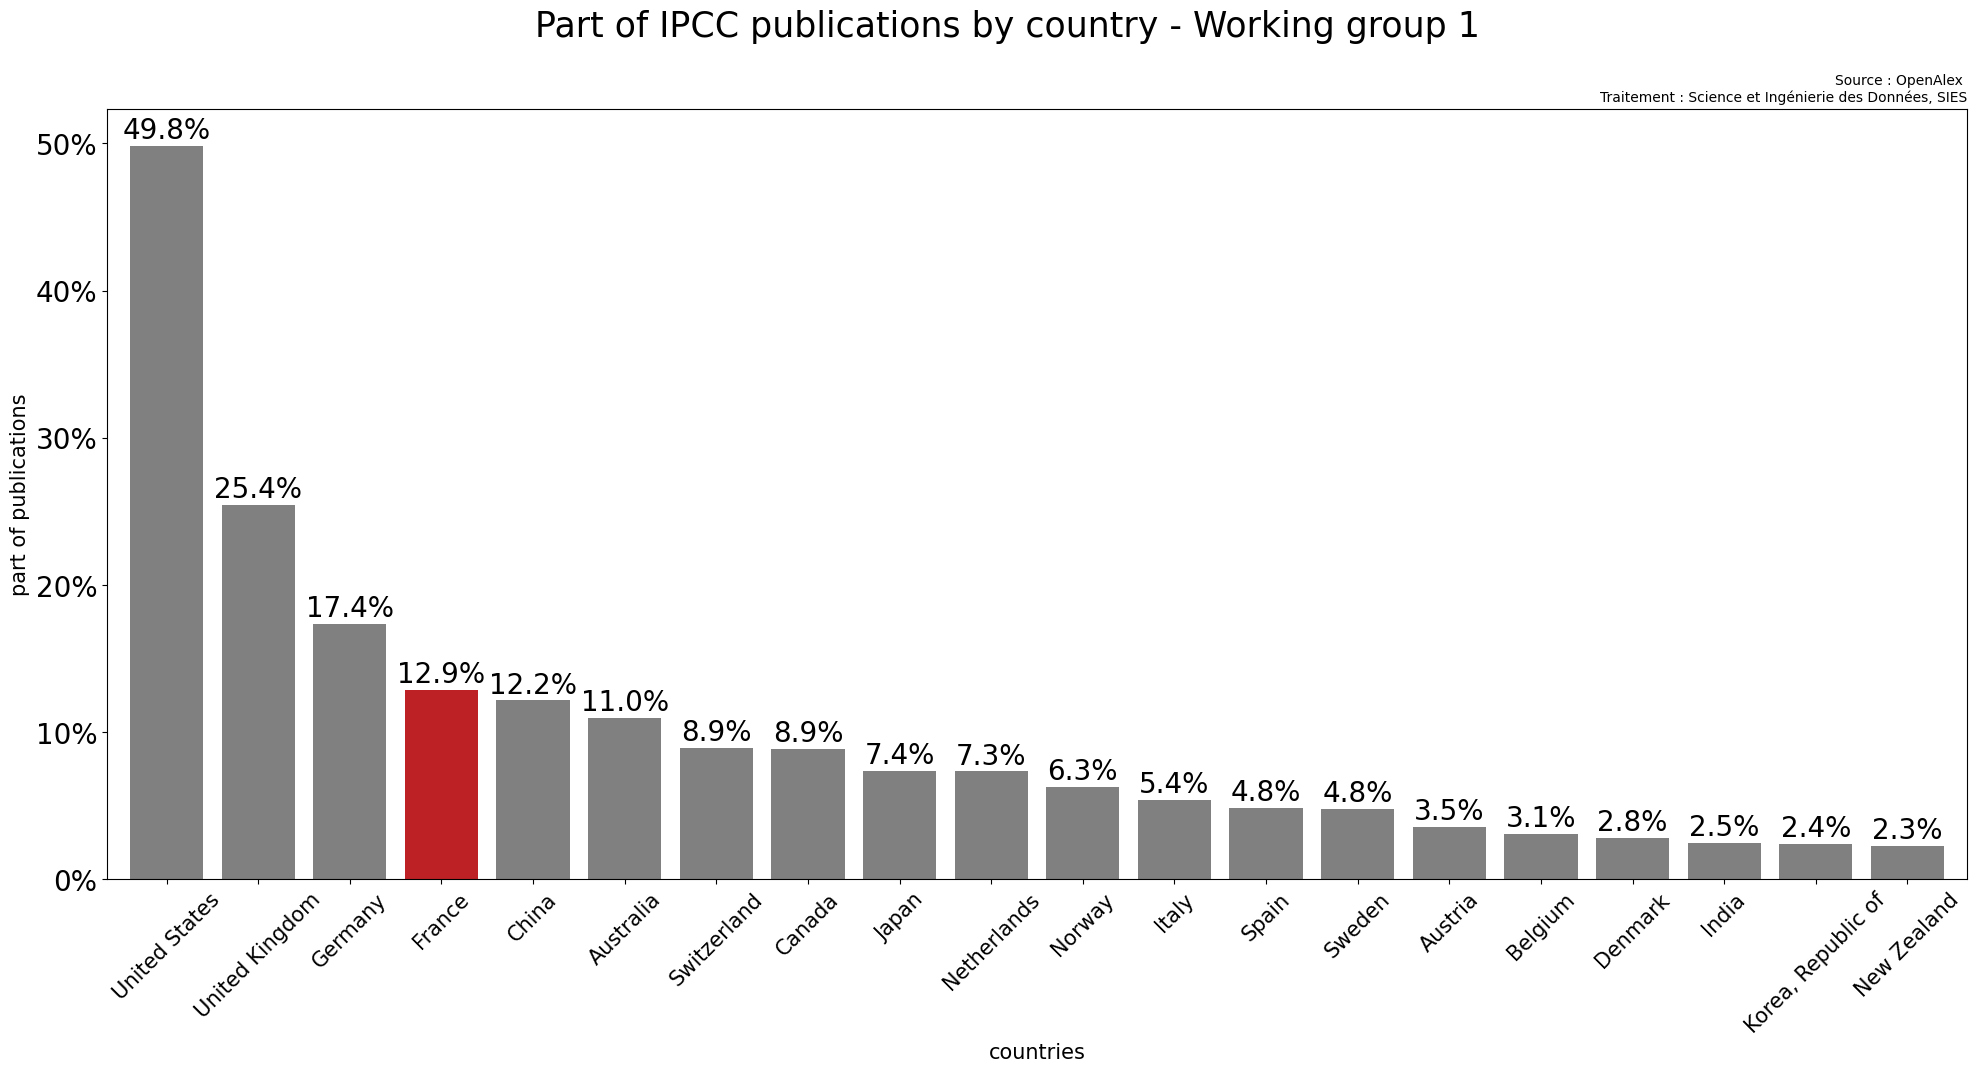

In [14]:
import matplotlib.pyplot as plt
df_ipcc1=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='1' for i in range(len(x))))]

data_counts=pd.Series(aplatir(list(df_ipcc1.countries.dropna()))).value_counts()
tot=len(df_ipcc1.doi.dropna())

data_counts = (data_counts / tot) * 100

plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)
for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Part of IPCC publications by country - Working group 1", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'part of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\1776115300.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)


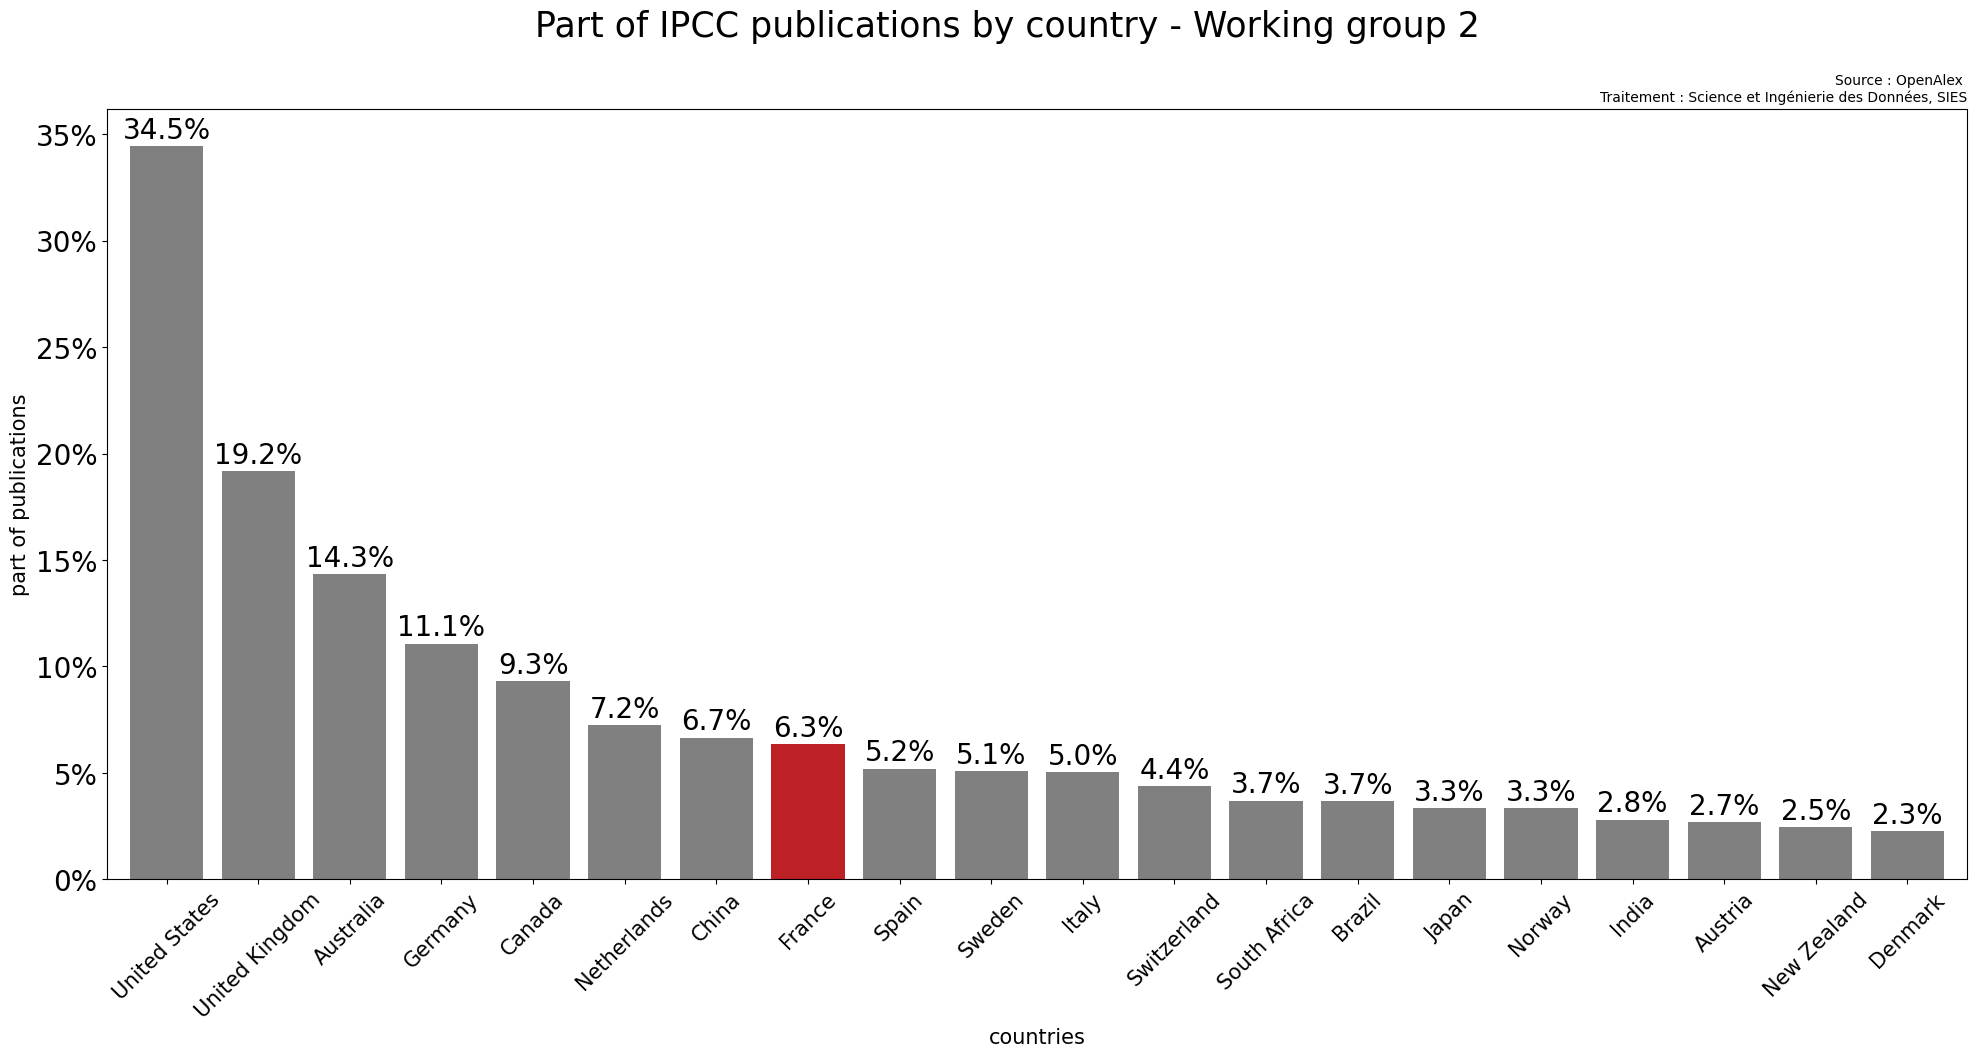

In [15]:
df_ipcc2=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='2' for i in range(len(x))))]
data_counts=pd.Series(aplatir(list(df_ipcc2.countries.dropna()))).value_counts()
tot=len(df_ipcc2.doi.dropna())

data_counts = (data_counts / tot) * 100

plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)
for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Part of IPCC publications by country - Working group 2", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'part of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\2706175573.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)


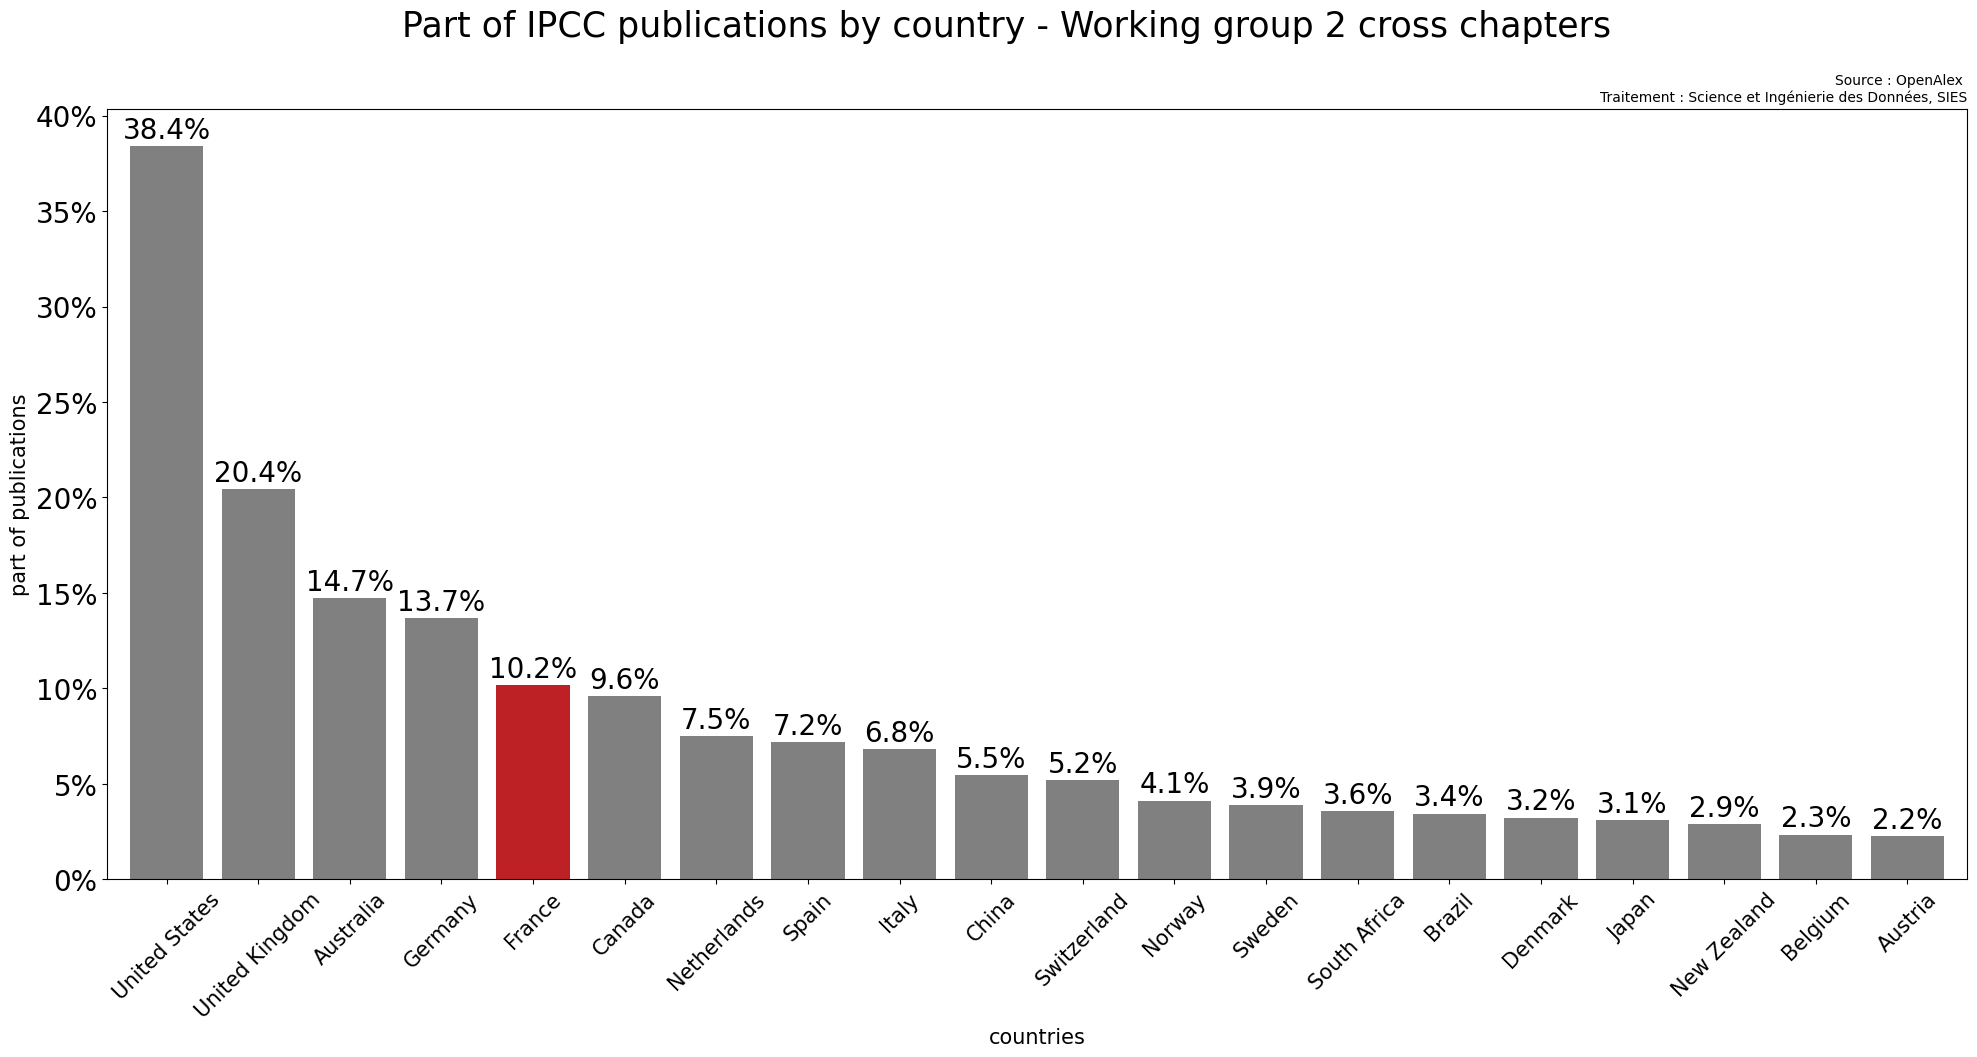

In [16]:
df_ipcc2cross=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='2_cross' for i in range(len(x))))]
data_counts=pd.Series(aplatir(list(df_ipcc2cross.countries.dropna()))).value_counts()
tot=len(df_ipcc2cross.doi.dropna())

data_counts = (data_counts / tot) * 100

plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)
for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Part of IPCC publications by country - Working group 2 cross chapters", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'part of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\1241855789.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)


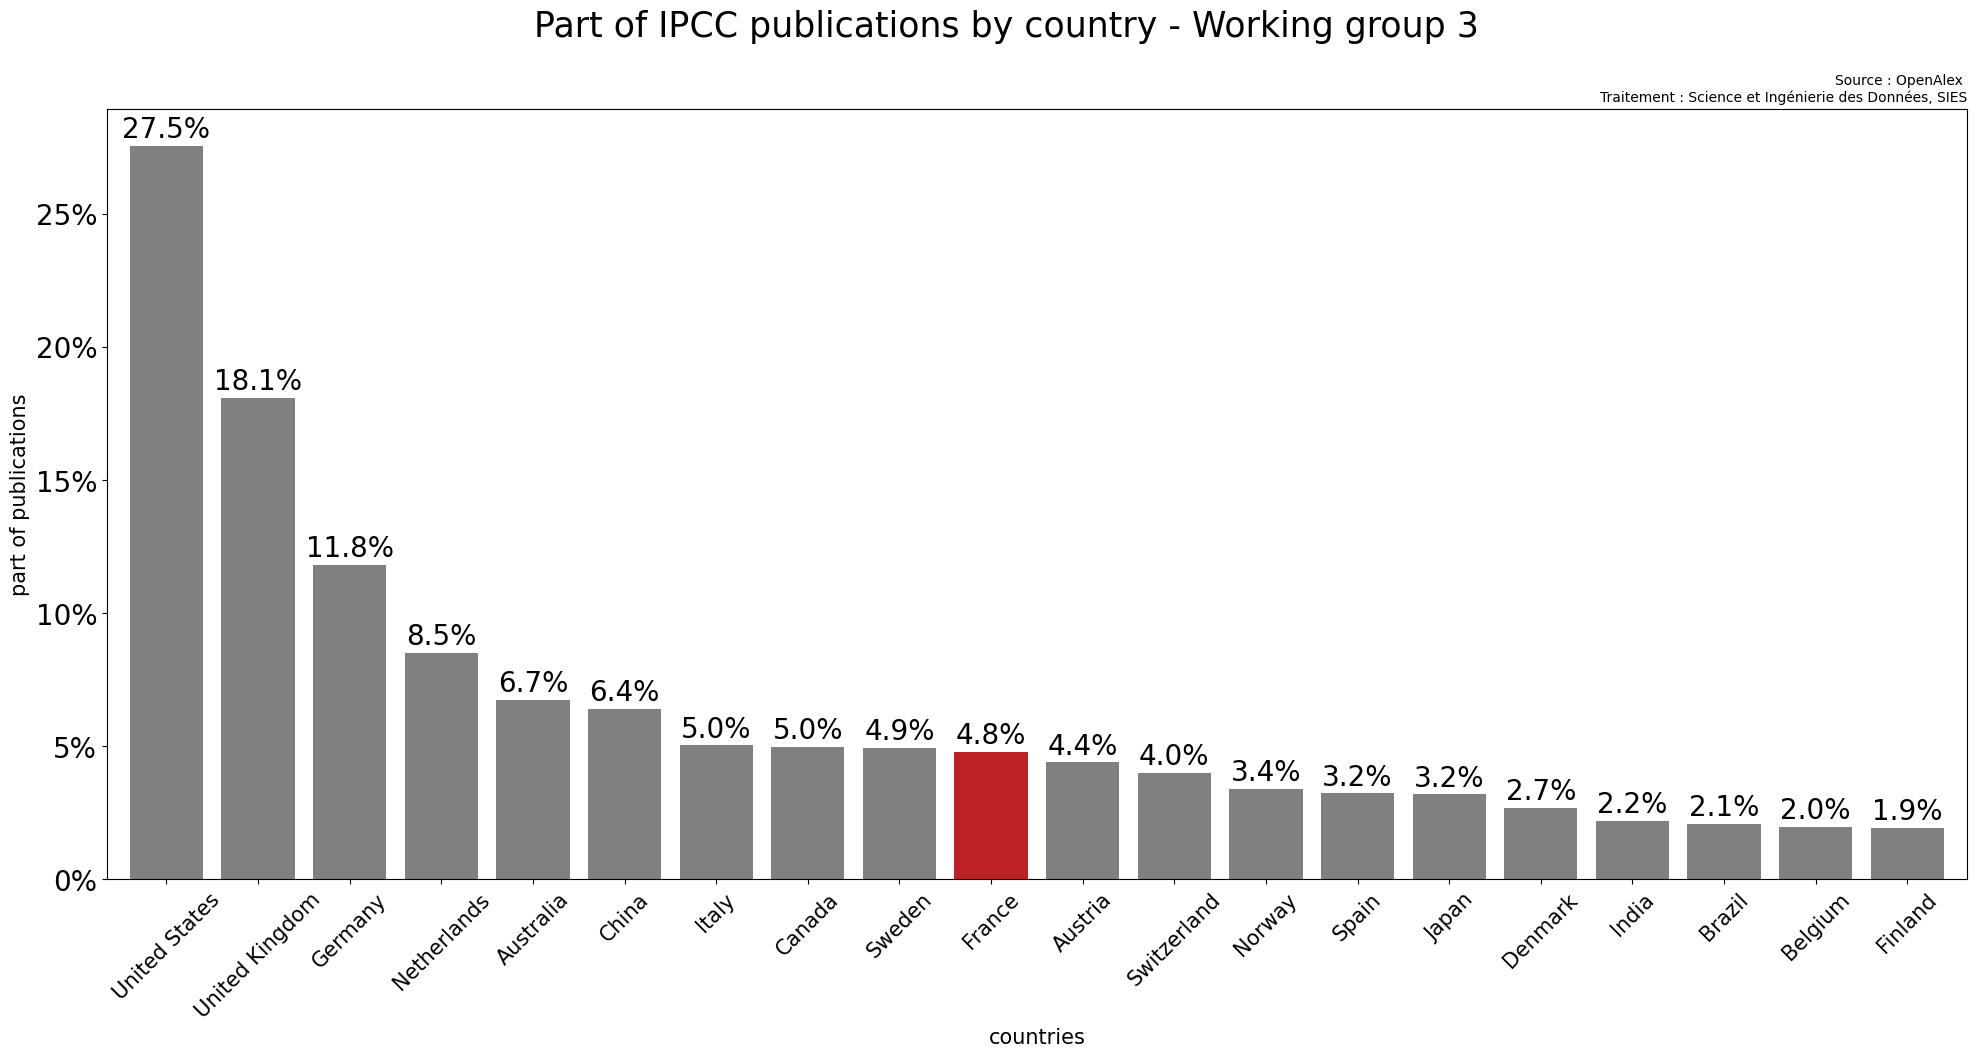

In [17]:
df_ipcc3=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='3' for i in range(len(x))))]
data_counts=pd.Series(aplatir(list(df_ipcc3.countries.dropna()))).value_counts()
tot=len(df_ipcc3.doi.dropna())

data_counts = (data_counts / tot) * 100

plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)
for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Part of IPCC publications by country - Working group 3", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'part of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\3624341156.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


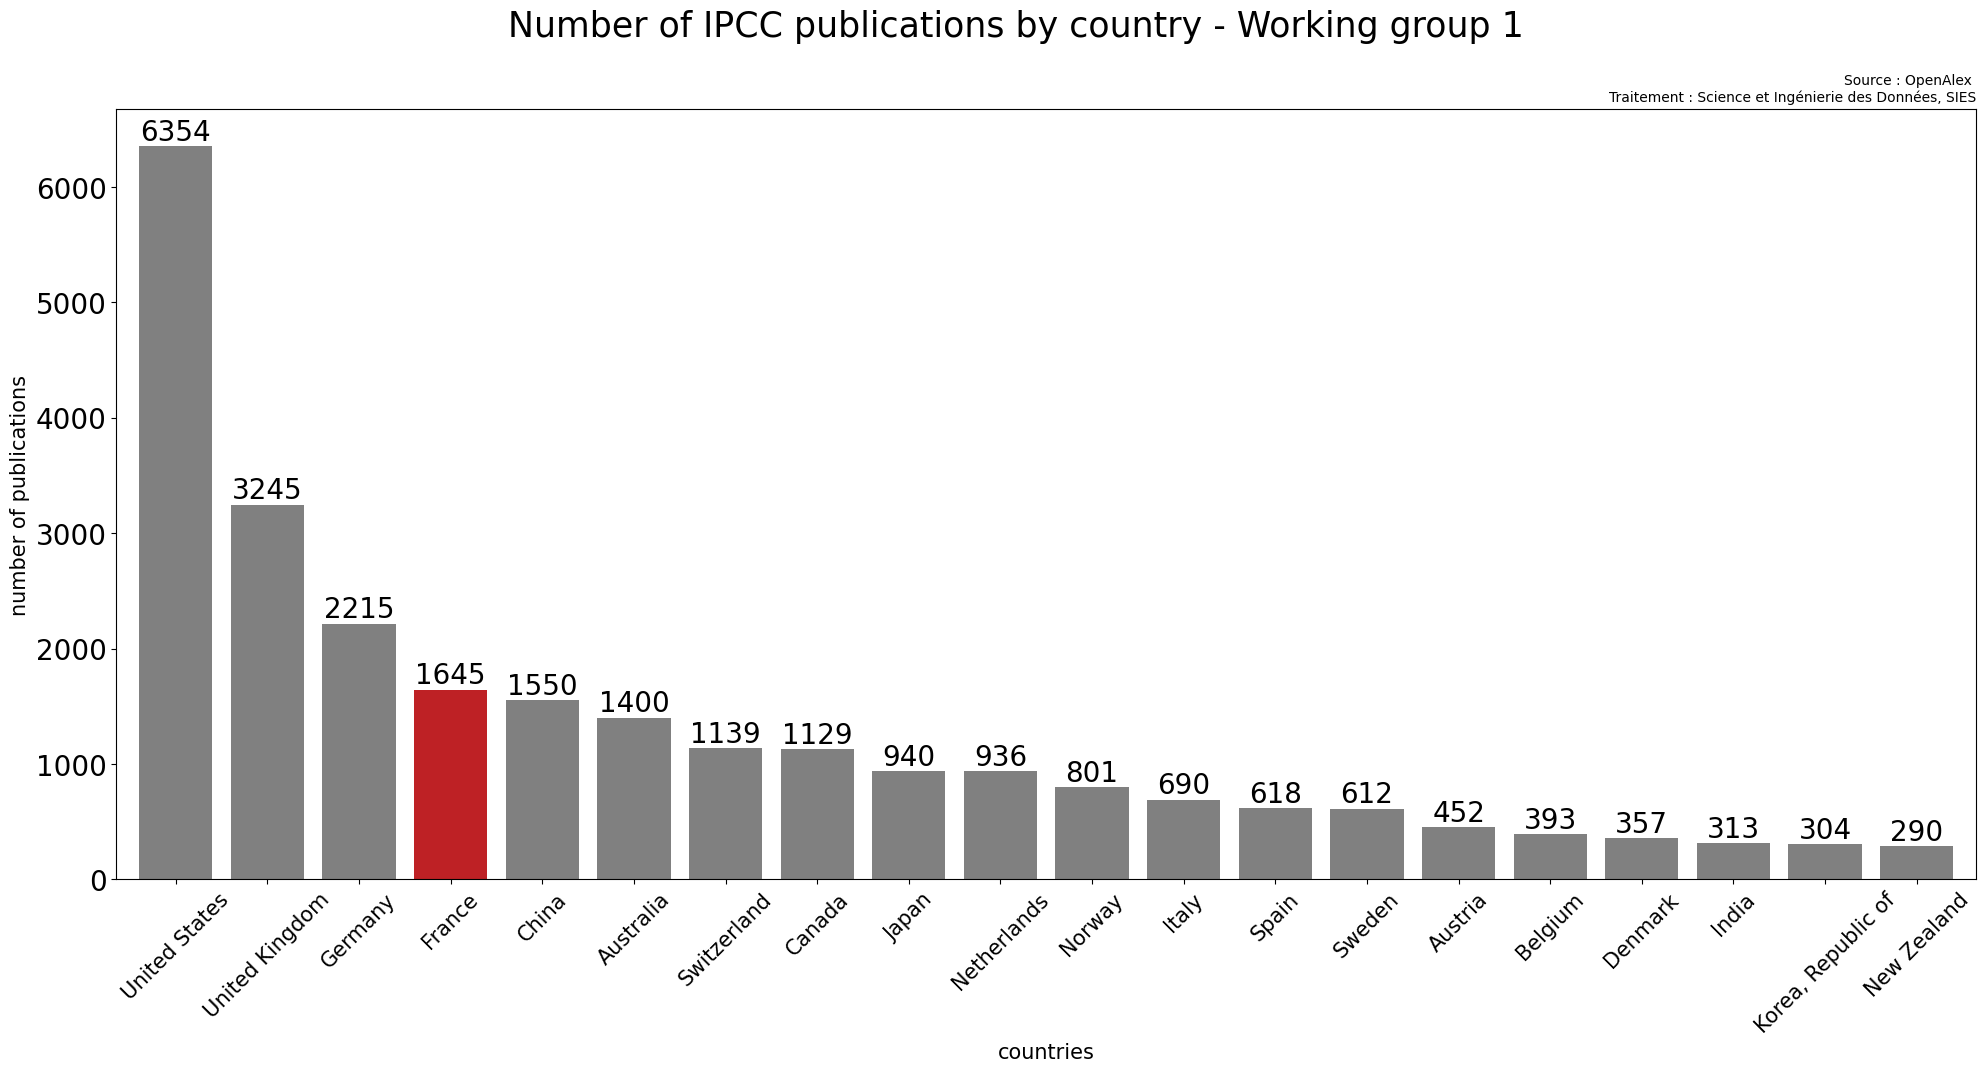

In [18]:
import matplotlib.pyplot as plt
df_ipcc1=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='1' for i in range(len(x))))]


data_counts=pd.Series(aplatir(list(df_ipcc1.countries.dropna()))).value_counts()
plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Number of IPCC publications by country - Working group 1", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\2573737439.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


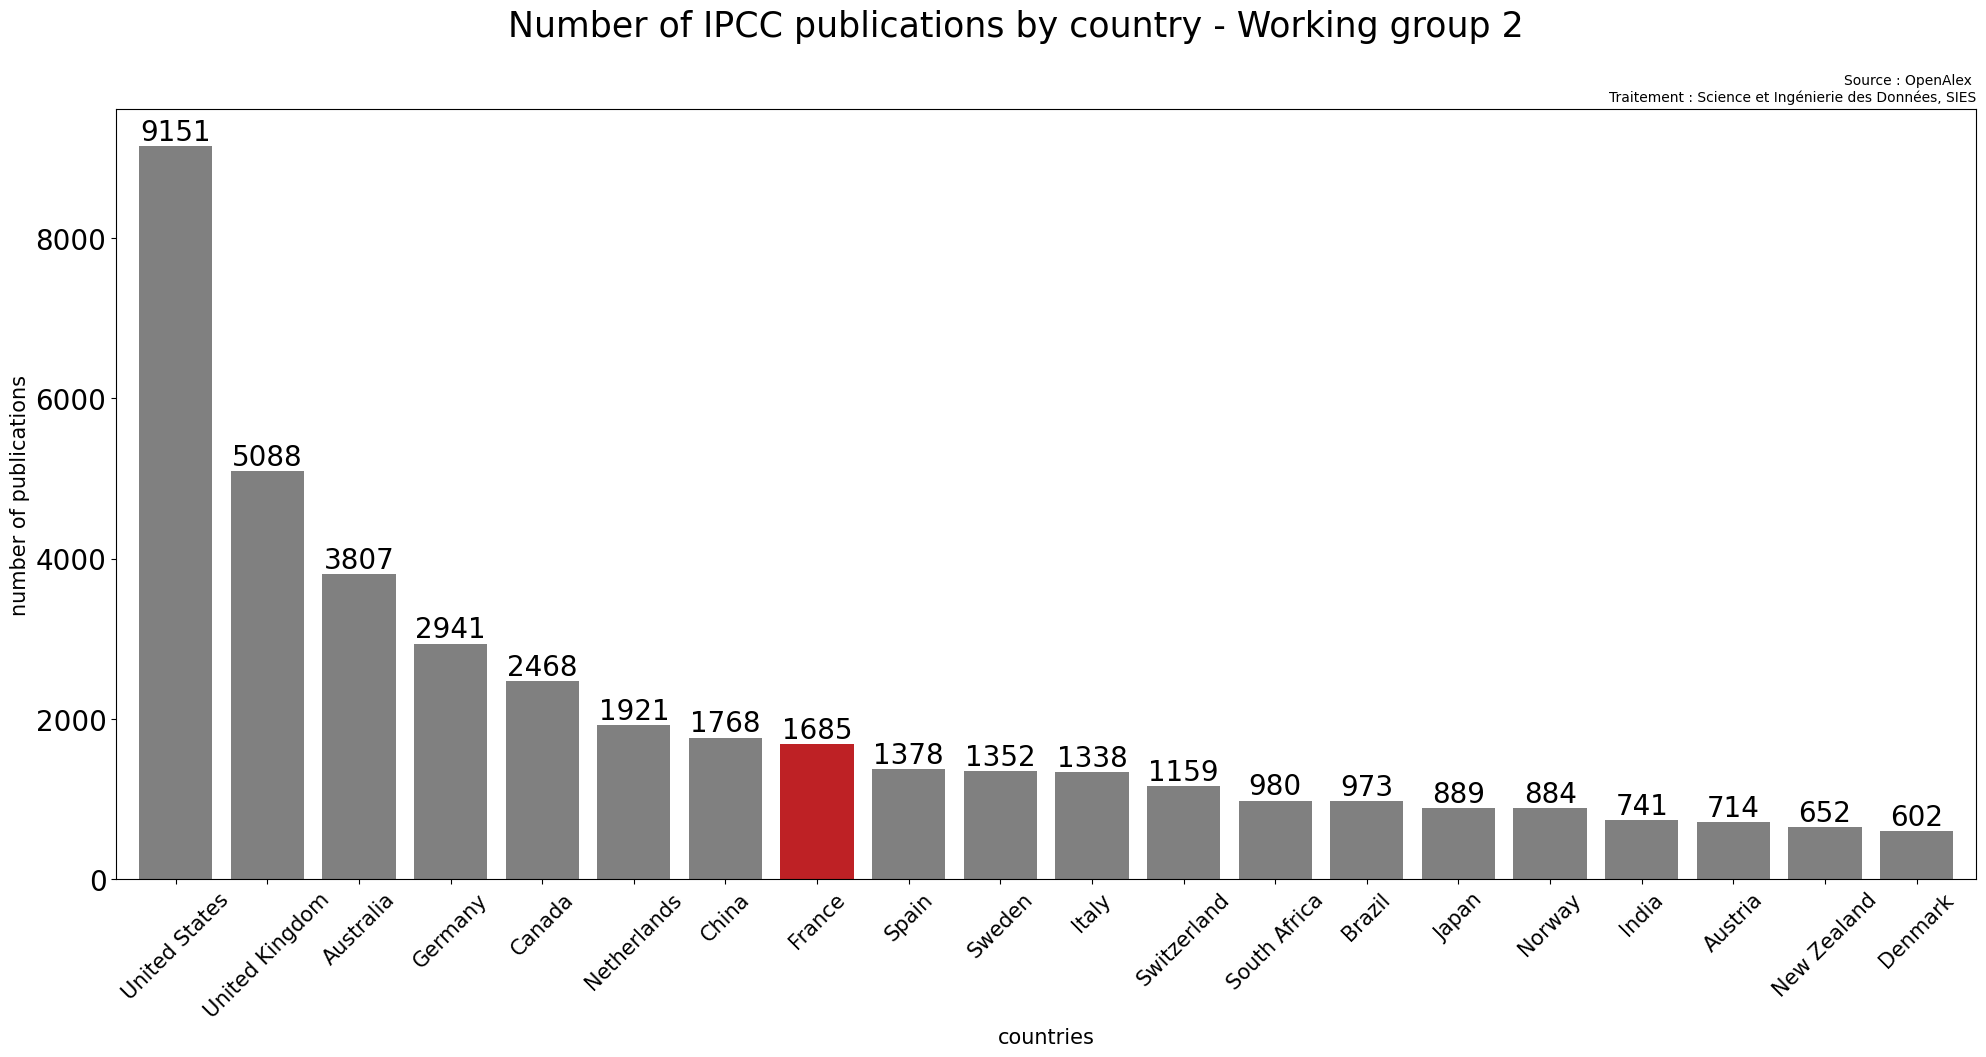

In [19]:
import matplotlib.pyplot as plt
df_ipcc2=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='2' for i in range(len(x))))]


data_counts=pd.Series(aplatir(list(df_ipcc2.countries.dropna()))).value_counts()
plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Number of IPCC publications by country - Working group 2", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\260217886.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


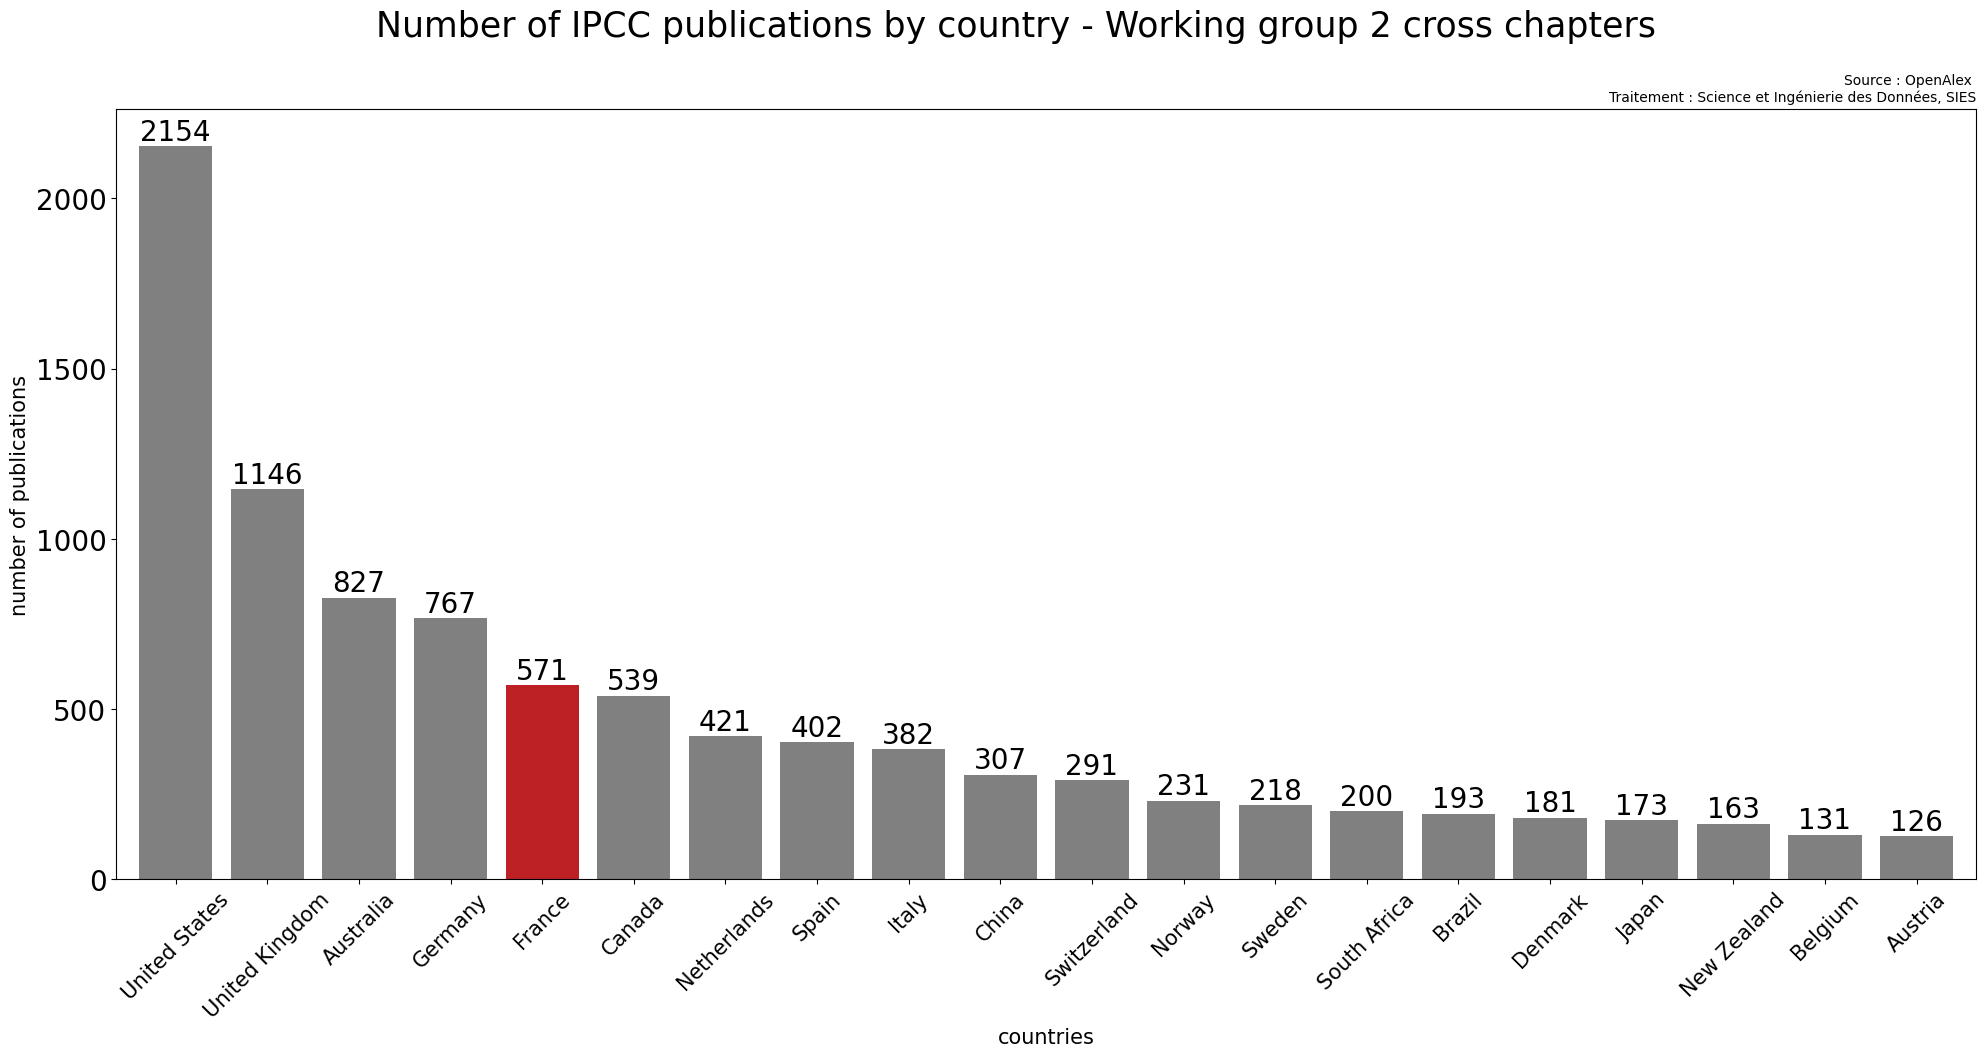

In [20]:
import matplotlib.pyplot as plt
df_ipcc2c=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='2_cross' for i in range(len(x))))]


data_counts=pd.Series(aplatir(list(df_ipcc2c.countries.dropna()))).value_counts()
plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Number of IPCC publications by country - Working group 2 cross chapters", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\1584869353.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


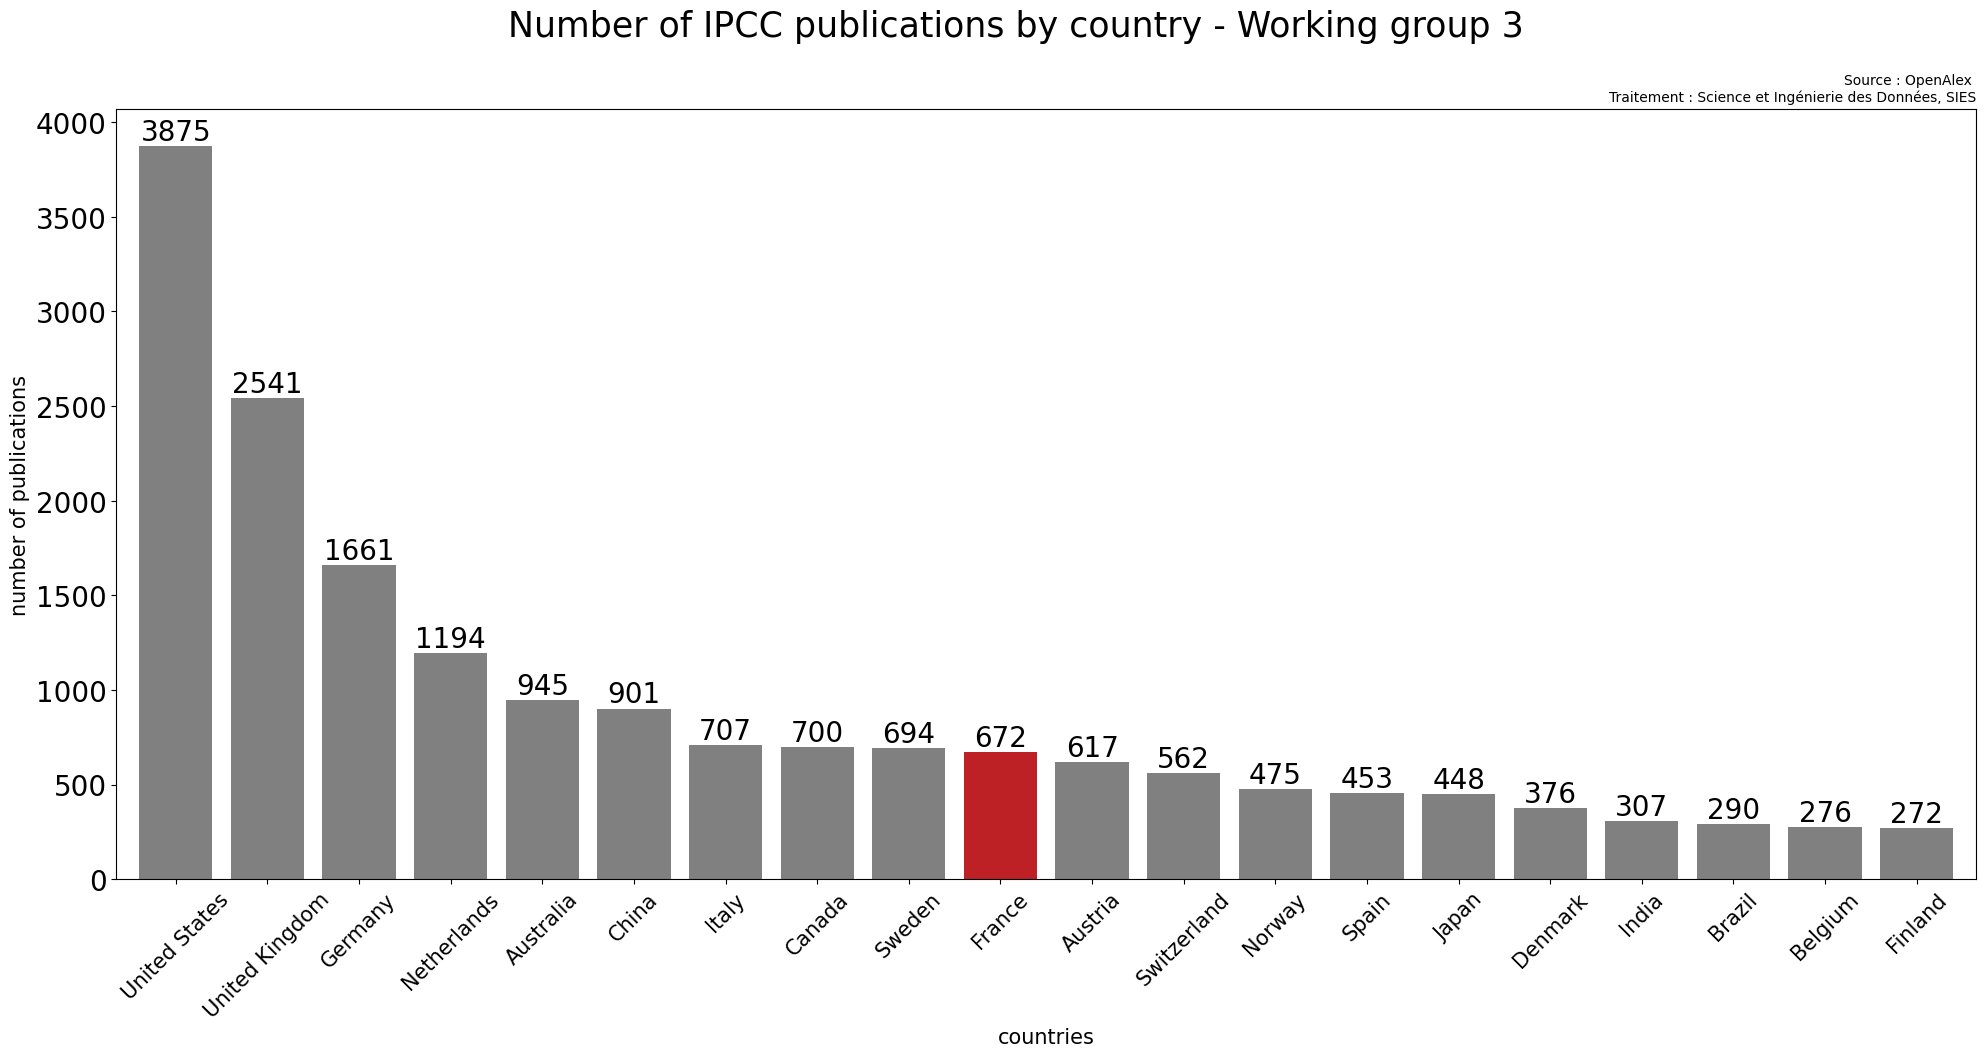

In [21]:
import matplotlib.pyplot as plt
df_ipcc3=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(x[i].get('wg')=='3' for i in range(len(x))))]


data_counts=pd.Series(aplatir(list(df_ipcc3.countries.dropna()))).value_counts()
plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Number of IPCC publications by country - Working group 3", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

IPBES

In [8]:
df_ipbes=df[pd.isna(df.ipbes)==False]

In [9]:
pd.Series(aplatir(list(df_ipbes.countries.dropna()))).value_counts()

United States                  2485
United Kingdom                 1335
Australia                       841
Canada                          715
Germany                         669
                               ... 
Guernsey                          1
Armenia                           1
Grenada                           1
Falkland Islands (Malvinas)       1
Burundi                           1
Name: count, Length: 165, dtype: int64

In [10]:
len(df_ipbes.doi)

6106

In [20]:
pd.Series([x.get('chapter') for x in aplatir(list(df_ipbes.ipbes))]).value_counts()

3                        1590
2.1_drivers              1169
6                        1154
4                         956
2.2_nature                714
5                         619
2.3_ncp                   487
ipbes-global_glossary     116
1                         103
Name: count, dtype: int64

C:\Users\haallat\AppData\Local\Temp\ipykernel_13672\2535286328.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


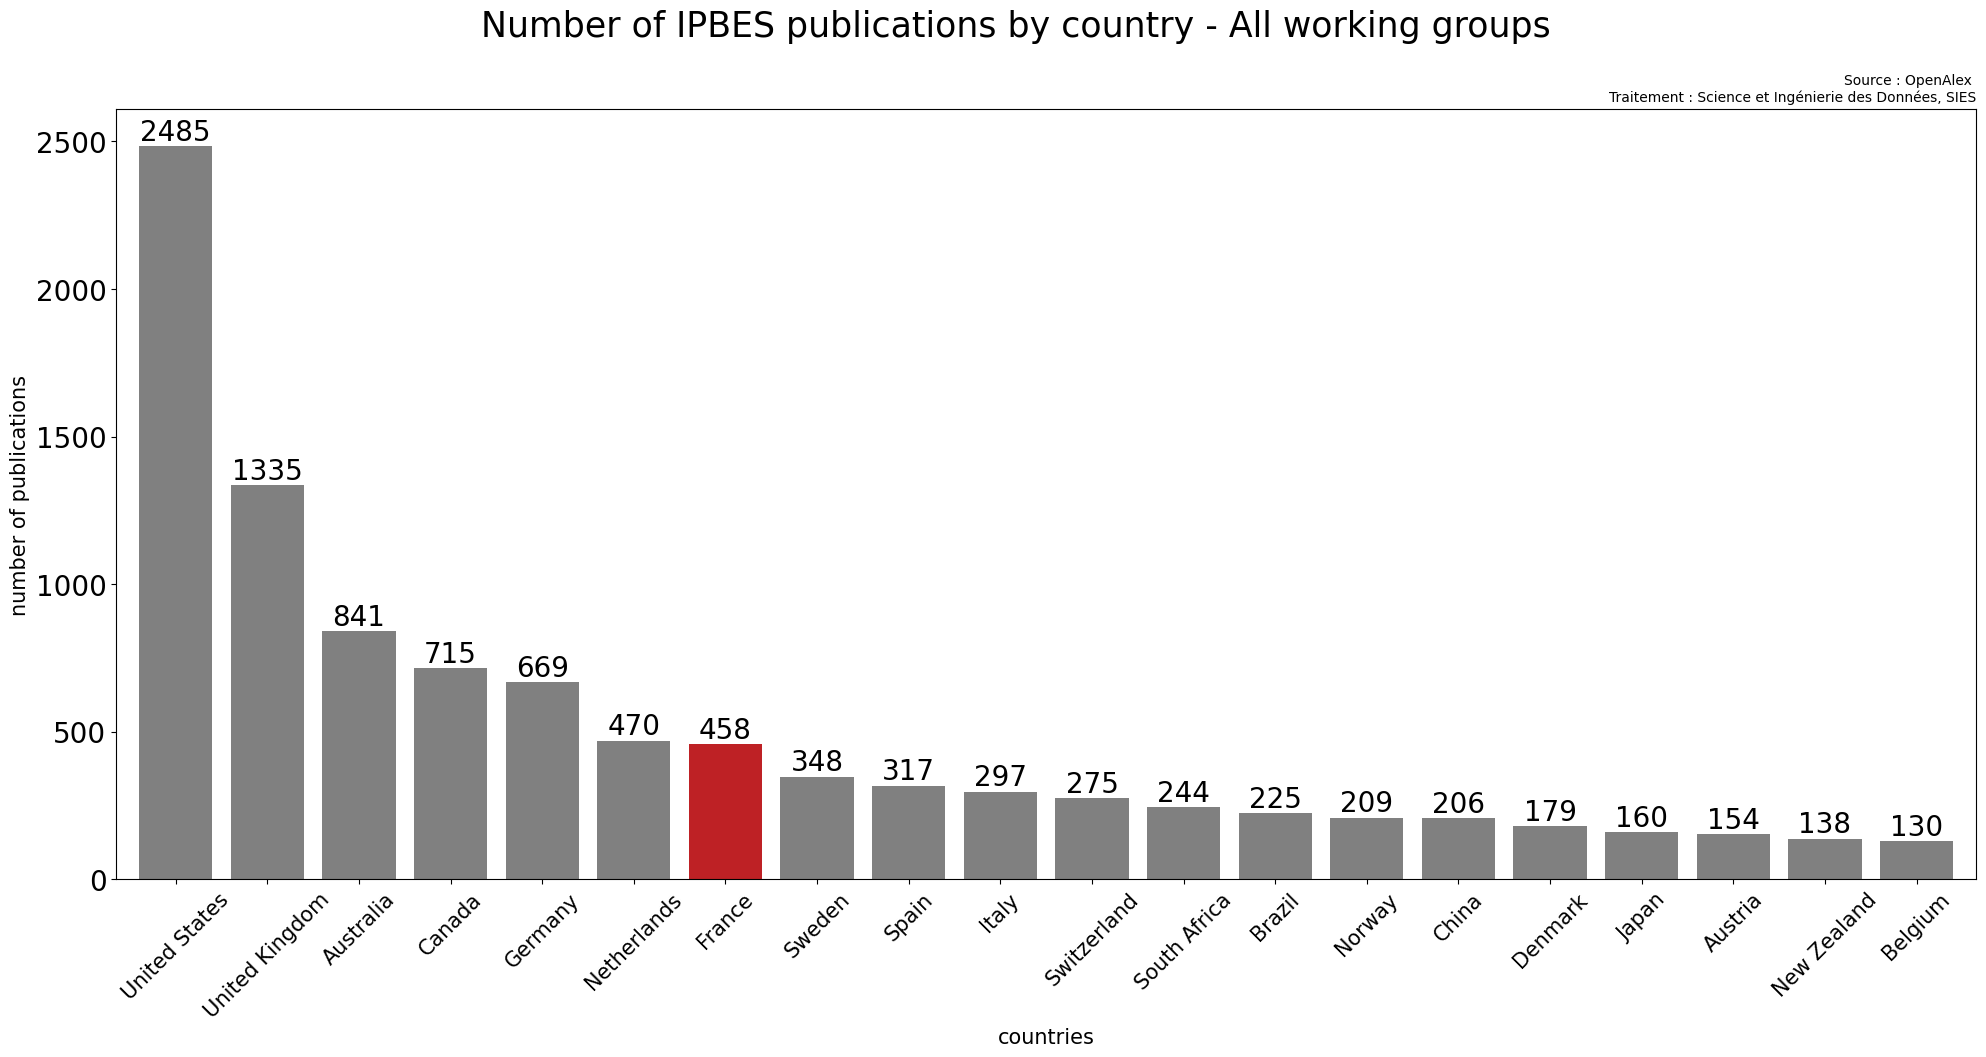

In [11]:
import matplotlib.pyplot as plt

data_counts=pd.Series(aplatir(list(df_ipbes.countries.dropna()))).value_counts()
plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Number of IPBES publications by country - All working groups", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(data_counts.index[:20], rotation=45, fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_13672\4099975283.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)


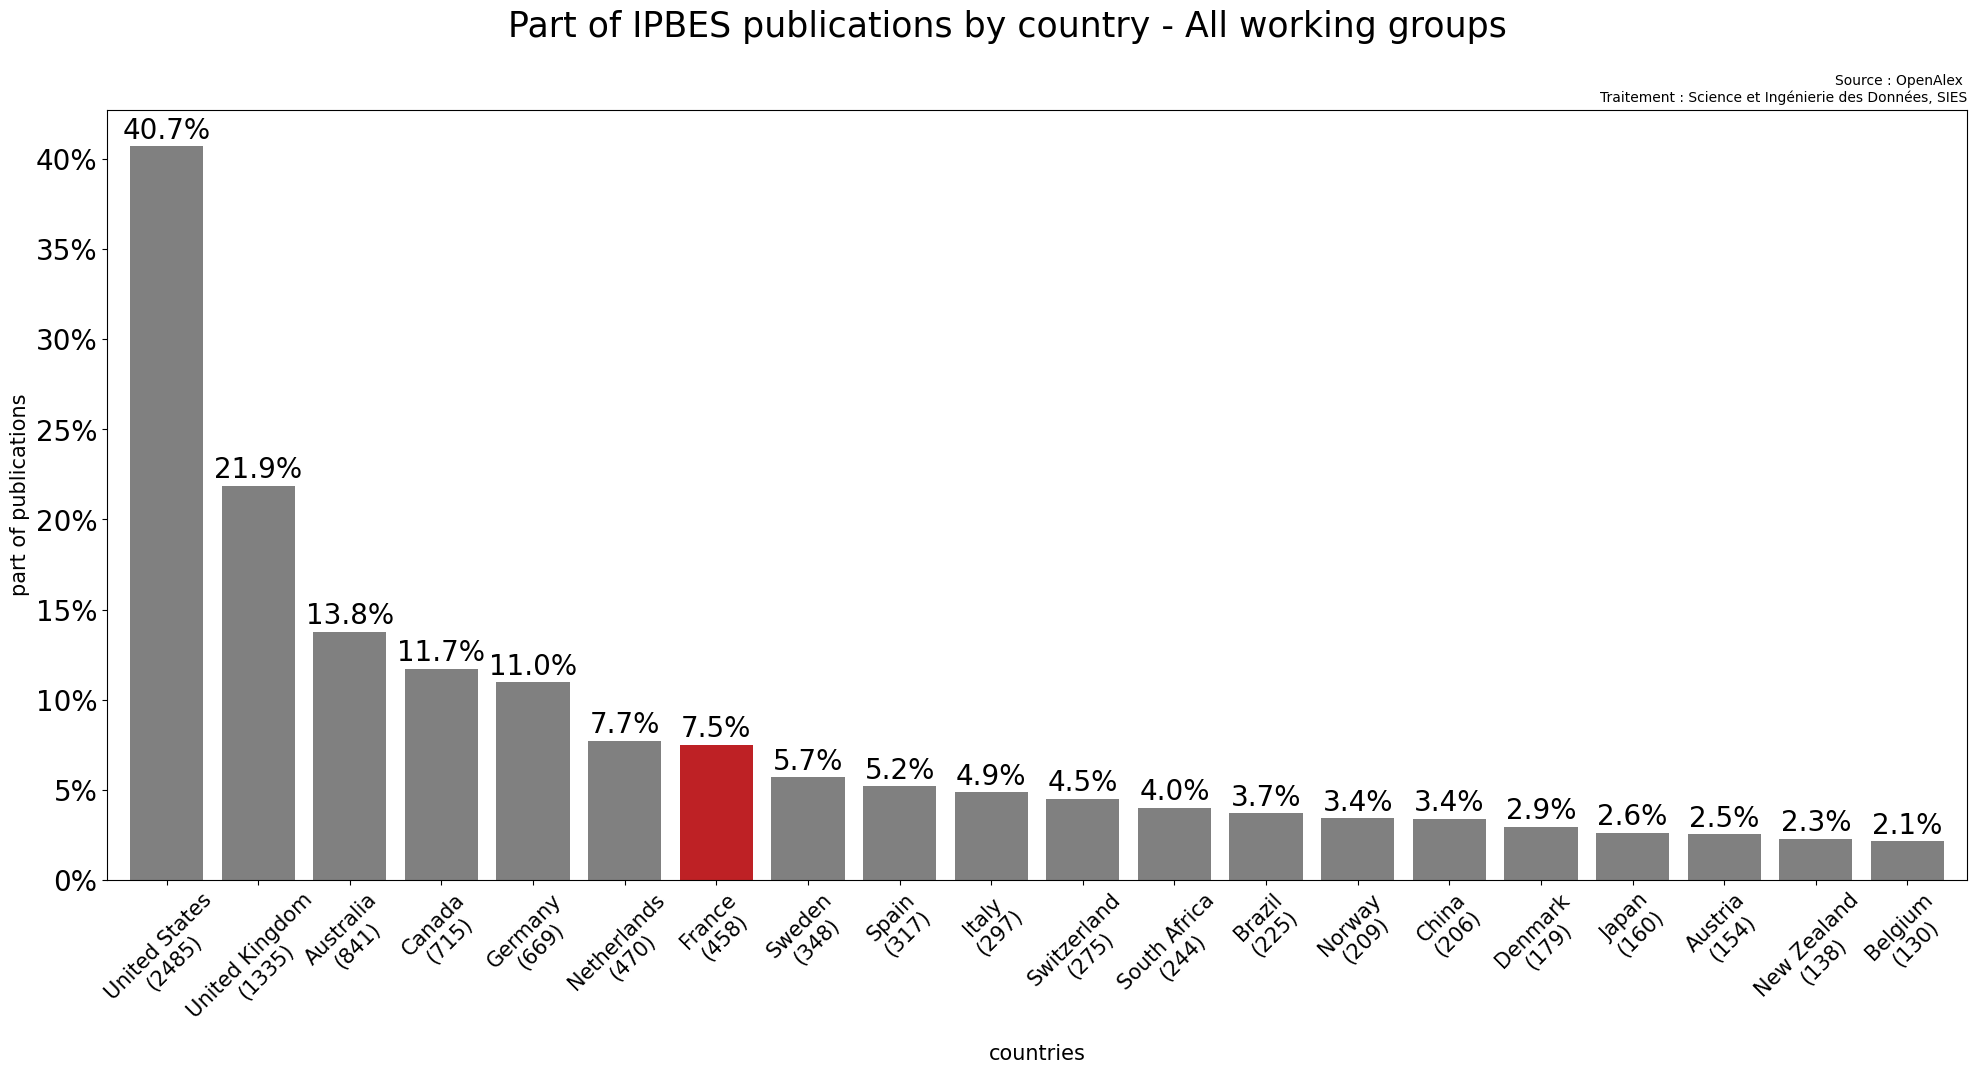

In [14]:
import matplotlib.pyplot as plt

data_counts1=pd.Series(aplatir(list(df_ipbes.countries.dropna()))).value_counts()
tot=len(df_ipbes.doi.dropna())

data_counts = (data_counts1 / tot) * 100

plt.figure(figsize=(24, 10))
color_dict = {'France': '#BE2125'}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)
for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Part of IPBES publications by country - All working groups", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=20)
x_labels = [f"{data_counts.index[:20][i]}\n({list(data_counts1.to_dict().values())[i]})" for i in range(0,20)]
ax.set_xticklabels(x_labels, rotation=45, fontsize=15)
ax.set_ylabel(f'part of publications', fontsize=15)
ax.set_xlabel(f'countries', fontsize=15)
plt.show()

repartitions

In [112]:
list_colors=["#cc566a",
"#cb6839",
"#c5aa46",
"#747734",
"#62b055",
"#4bb2ac",
"#7377cc",
"#be5dae"]

In [113]:
filters=['1','2','2_cross','3']
values=[]
for i in range(len(filters)):
    value={}
    data1=df_ipcc[df_ipcc['ipcc'].apply(lambda x: all(y.get('wg')==filters[i] for y in x))]
    data=pd.Series(aplatir(list(data1.countries.dropna()))).value_counts().to_dict()
    groups= ['United States','United Kingdom','Germany','France','China']
    tot={'United States':19002,'United Kingdom':10400,'Germany':6538,'France':3925,'China':4084}
    for k in range(len(groups)):
        value[groups[k]]=data[groups[k]]
    ordered_value={j: round(value[j]*100/tot[j],3) if j in value else 0 for j in groups}
    values.append(list(ordered_value.values()))

In [32]:
data1=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(y.get('wg')=='1' for y in x) & any(y.get('wg')=='2' for y in x) & all(y.get('wg')!='2_cross' for y in x) & all(y.get('wg')!='3' for y in x))]
data=pd.Series(aplatir(list(data1.countries.dropna()))).value_counts().to_dict()
groups= ['United States','United Kingdom','Germany','France','China']
tot={'United States':19002,'United Kingdom':10400,'Germany':6538,'France':3925,'China':4084}
for k in range(len(groups)):
    value[groups[k]]=data[groups[k]]
ordered_value={j: round(value[j]*100/tot[j],3) if j in value else 0 for j in groups}
values.append(list(ordered_value.values()))

data1=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(y.get('wg')=='2_cross' for y in x) & any(y.get('wg')=='2' for y in x) & all(y.get('wg')!='1' for y in x) & all(y.get('wg')!='3' for y in x))]
data=pd.Series(aplatir(list(data1.countries.dropna()))).value_counts().to_dict()
groups= ['United States','United Kingdom','Germany','France','China']
tot={'United States':19002,'United Kingdom':10400,'Germany':6538,'France':3925,'China':4084}
for k in range(len(groups)):
    value[groups[k]]=data[groups[k]]
ordered_value={j: round(value[j]*100/tot[j],3) if j in value else 0 for j in groups}
values.append(list(ordered_value.values()))

data1=df_ipcc[df_ipcc['ipcc'].apply(lambda x: any(y.get('wg')=='3' for y in x) & any(y.get('wg')=='2' for y in x) & all(y.get('wg')!='2_cross' for y in x) & all(y.get('wg')!='1' for y in x))]
data=pd.Series(aplatir(list(data1.countries.dropna()))).value_counts().to_dict()
groups= ['United States','United Kingdom','Germany','France','China']
tot={'United States':19002,'United Kingdom':10400,'Germany':6538,'France':3925,'China':4084}
for k in range(len(groups)):
    value[groups[k]]=data[groups[k]]
ordered_value={j: round(value[j]*100/tot[j],3) if j in value else 0 for j in groups}
values.append(list(ordered_value.values()))

In [114]:
values

[[27.534, 24.846, 26.598, 33.427, 31.611],
 [37.549, 36.404, 32.655, 30.064, 34.574],
 [6.699, 5.731, 6.638, 8.688, 4.383],
 [16.561, 19.356, 20.19, 13.452, 19.662]]

In [115]:
wg_simple=list(map(sum, zip(*values)))

In [116]:
wg_simple

[88.34299999999999, 86.33699999999999, 86.081, 85.631, 90.22999999999999]

In [117]:
values_simple=values+[[100 - wg_simple[i] for i in range(len(wg_simple))]]

In [118]:
labels=['Sciences Physique (WG1)','Adaptations (WG2)','Adaptations - risques locaux (WG2 cross)','Atténuations (WG3)','Multi WG']

In [119]:
#labels=['Sciences Physique (WG1)','Adaptations (WG2)','Adaptations - risques locaux (WG2 cross)','Atténuations (WG3)','Sciences Physique et Adaptations','Adaptations et Adaptations - risques locaux','Adaptation et Atténuation','Multi WG']

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\618047889.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, size=10)
C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\618047889.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=10)


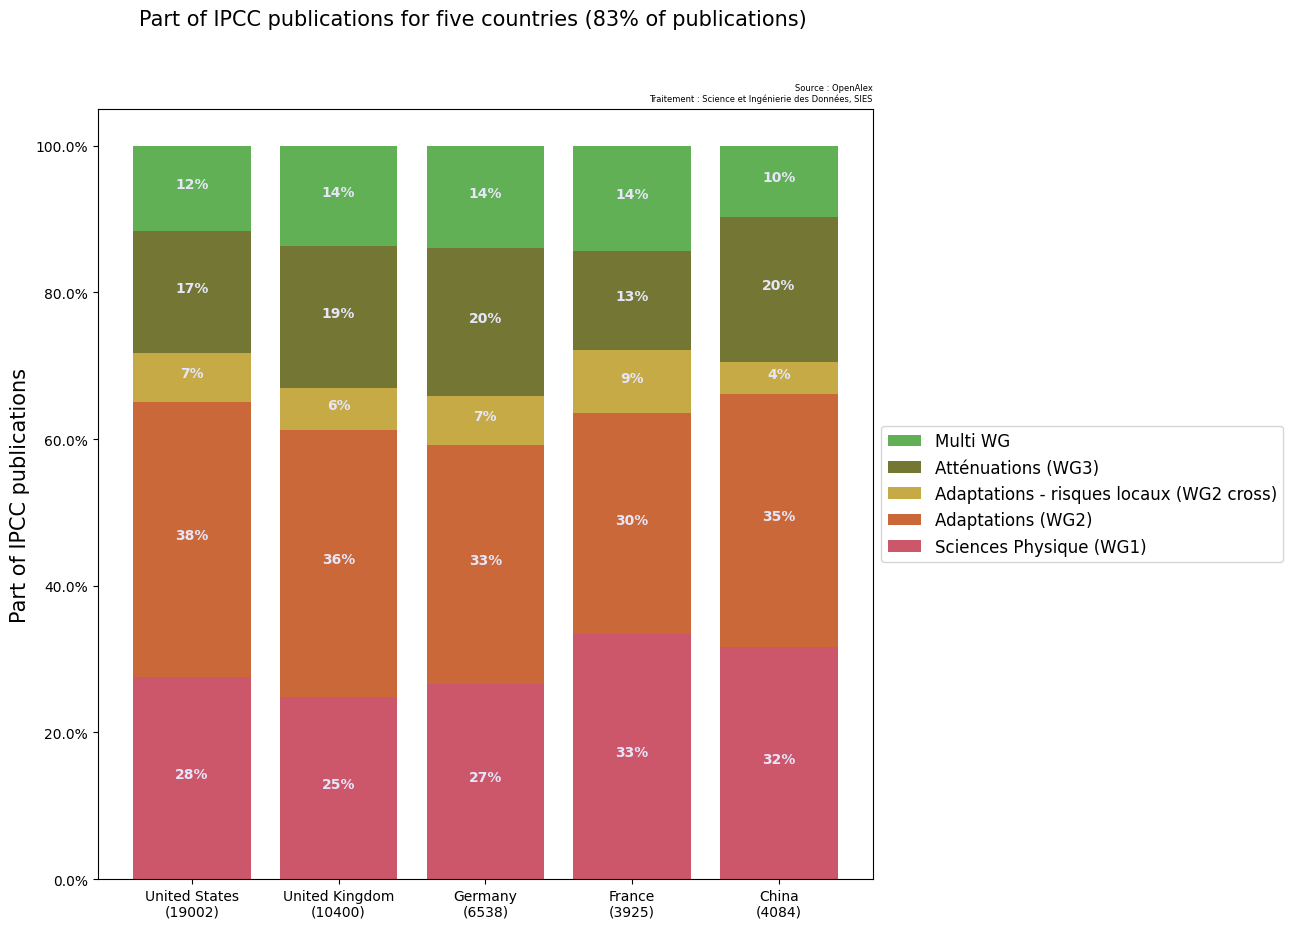

In [120]:
import matplotlib.pyplot as plt
import numpy as np

groups= ['United States','United Kingdom','Germany','France','China']
fig, ax = plt.subplots(figsize=(10, 10))
values_array=np.array(values_simple)
tot={'United States':19002,'United Kingdom':10400,'Germany':6538,'France':3925,'China':4084}

for i in range(values_array.shape[0]):
  ax.bar(groups, values_array[i], bottom = np.sum(values_array[:i], axis = 0), color=list_colors[i], label=labels[i])

i=0
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          f'{bar.get_height():.0f}%', ha = 'center',
          color = 'lavender', weight = 'bold', size = 10) 
  i+=1

plt.suptitle(f"Part of IPCC publications for five countries (83% of publications)", size=15)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=6, loc='right')

x_labels = [f"{groups[i]}\n({list(tot.values())[i]})" for i in range(len(groups))]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(x_labels, size=10)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=10)
ax.set_ylabel(f'Part of IPCC publications', fontsize=15)

plt.show() 

Time repartition

In [40]:
df_ipcc_fr=df_ipcc.drop_duplicates(subset=['doi']).explode('countries')[df_ipcc.drop_duplicates(subset=['doi']).explode('countries').countries=='France']

In [41]:
df_ipbes_fr=df_ipbes.drop_duplicates(subset=['doi']).explode('countries')[df_ipbes.drop_duplicates(subset=['doi']).explode('countries').countries=='France']

In [42]:
list_years=[1686,1800,1900,1950,1980,2000,2010,2013]
#[2013,2014,2015,2016,2018,2019,2020,2021,2022,2023]

In [43]:
def years(year):
    for i in range(len(list_years)-1):
        if int(year) in list(range(list_years[i],list_years[i+1])):
            return f"{list_years[i]}-{list_years[i+1]-1}"
    else:
        return str(year)

In [44]:
list_years_ipcc=[]
list_years_ipbes=[]
for year in list(df_ipcc_fr.loc[:,'year']):
    try:
        list_years_ipcc.append(years(year))
    except:
        list_years_ipcc.append(None)
for year in list(df_ipbes_fr.loc[:,'year']):
    try:
        list_years_ipbes.append(years(year))
    except:
        list_years_ipbes.append(None)

In [45]:
df_ipcc_fr['years']=None
df_ipbes_fr['years']=None

In [46]:
df_ipcc_fr['years']=[str(int(float(x))) if pd.isna(x)==False and x.find('-')<0 else x for x in list_years_ipcc]
df_ipbes_fr['years']=list_years_ipbes

In [47]:
data_counts=df_ipcc_fr.years.value_counts()

In [48]:
df_ipcc_fr.years.dropna().apply(lambda x: int(x) if isinstance(x,float) else x).value_counts().sum()

3908

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\2100751809.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)


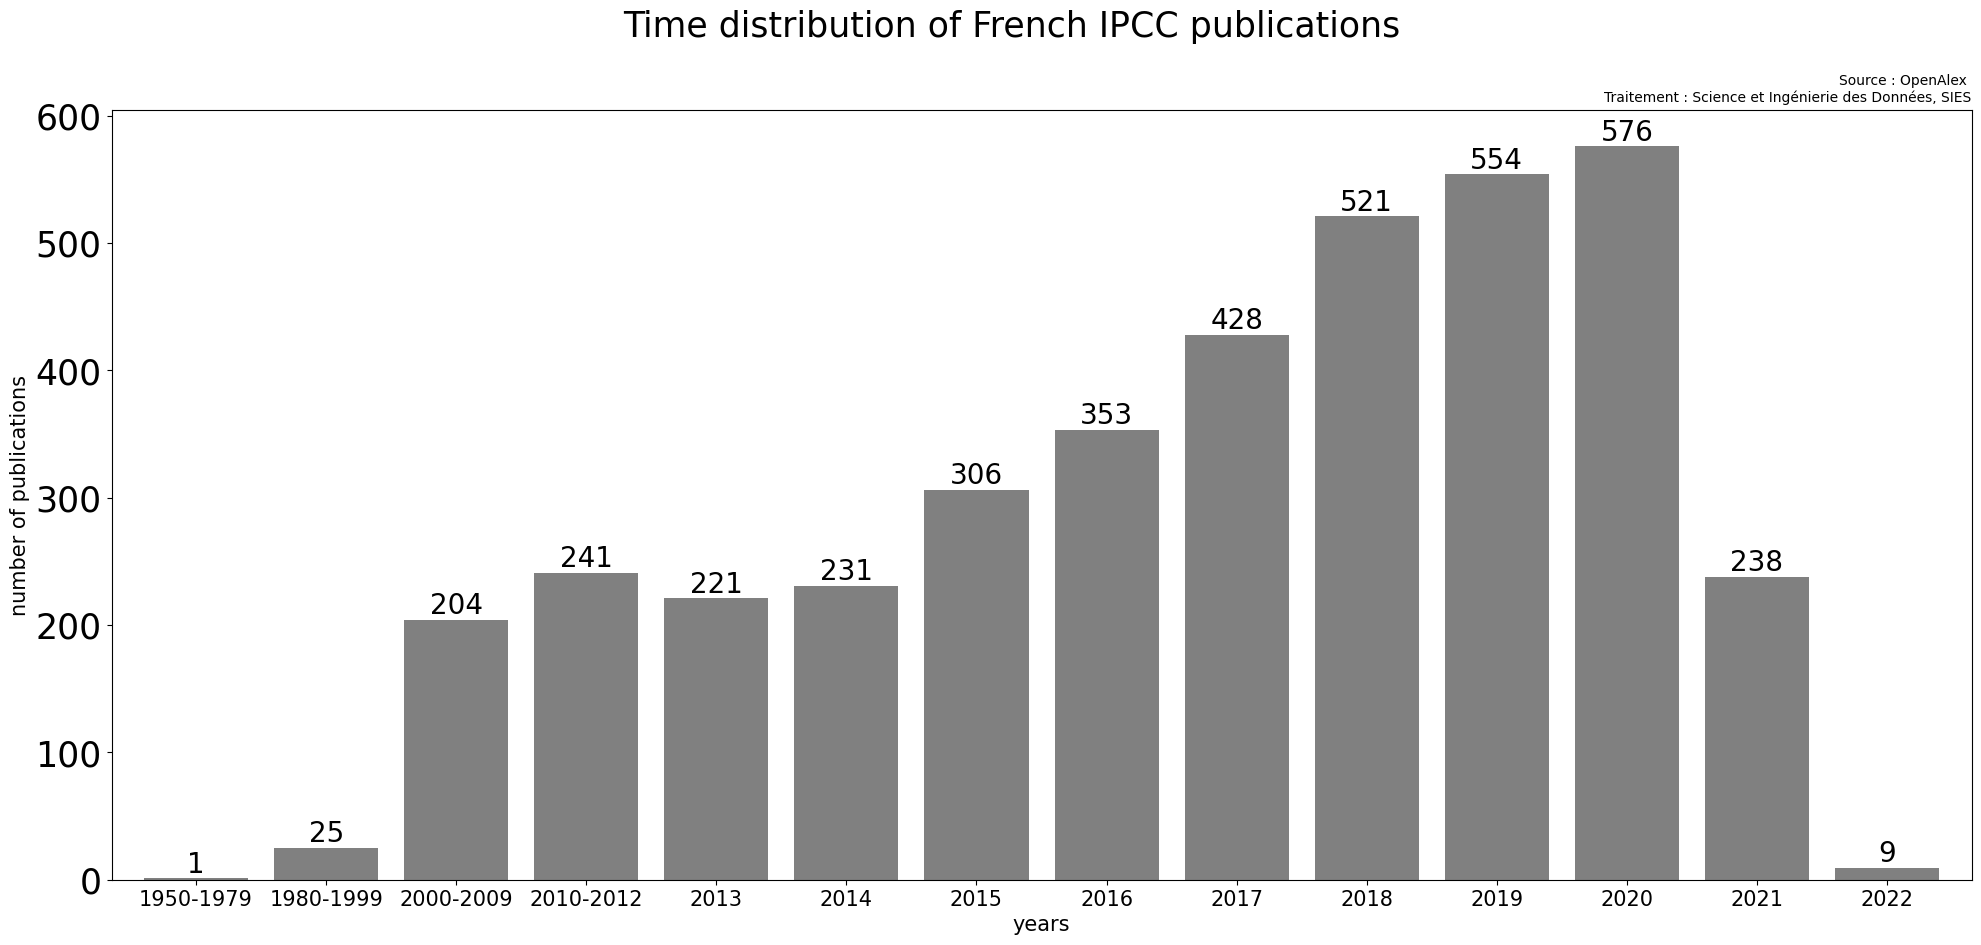

In [49]:
import matplotlib.pyplot as plt

data_counts=df_ipcc_fr.years.dropna().apply(lambda x: int(x) if isinstance(x,float) else x).value_counts()
data_counts=pd.Series(dict(data_counts)).sort_index()
plt.figure(figsize=(24, 10))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{int(v)}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Time distribution of French IPCC publications", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xticklabels(data_counts.index, rotation='horizontal', fontsize=15)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'years', fontsize=15)
plt.show()

In [50]:
df_ipbes_fr.year.value_counts().sum()

458

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\2398976398.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


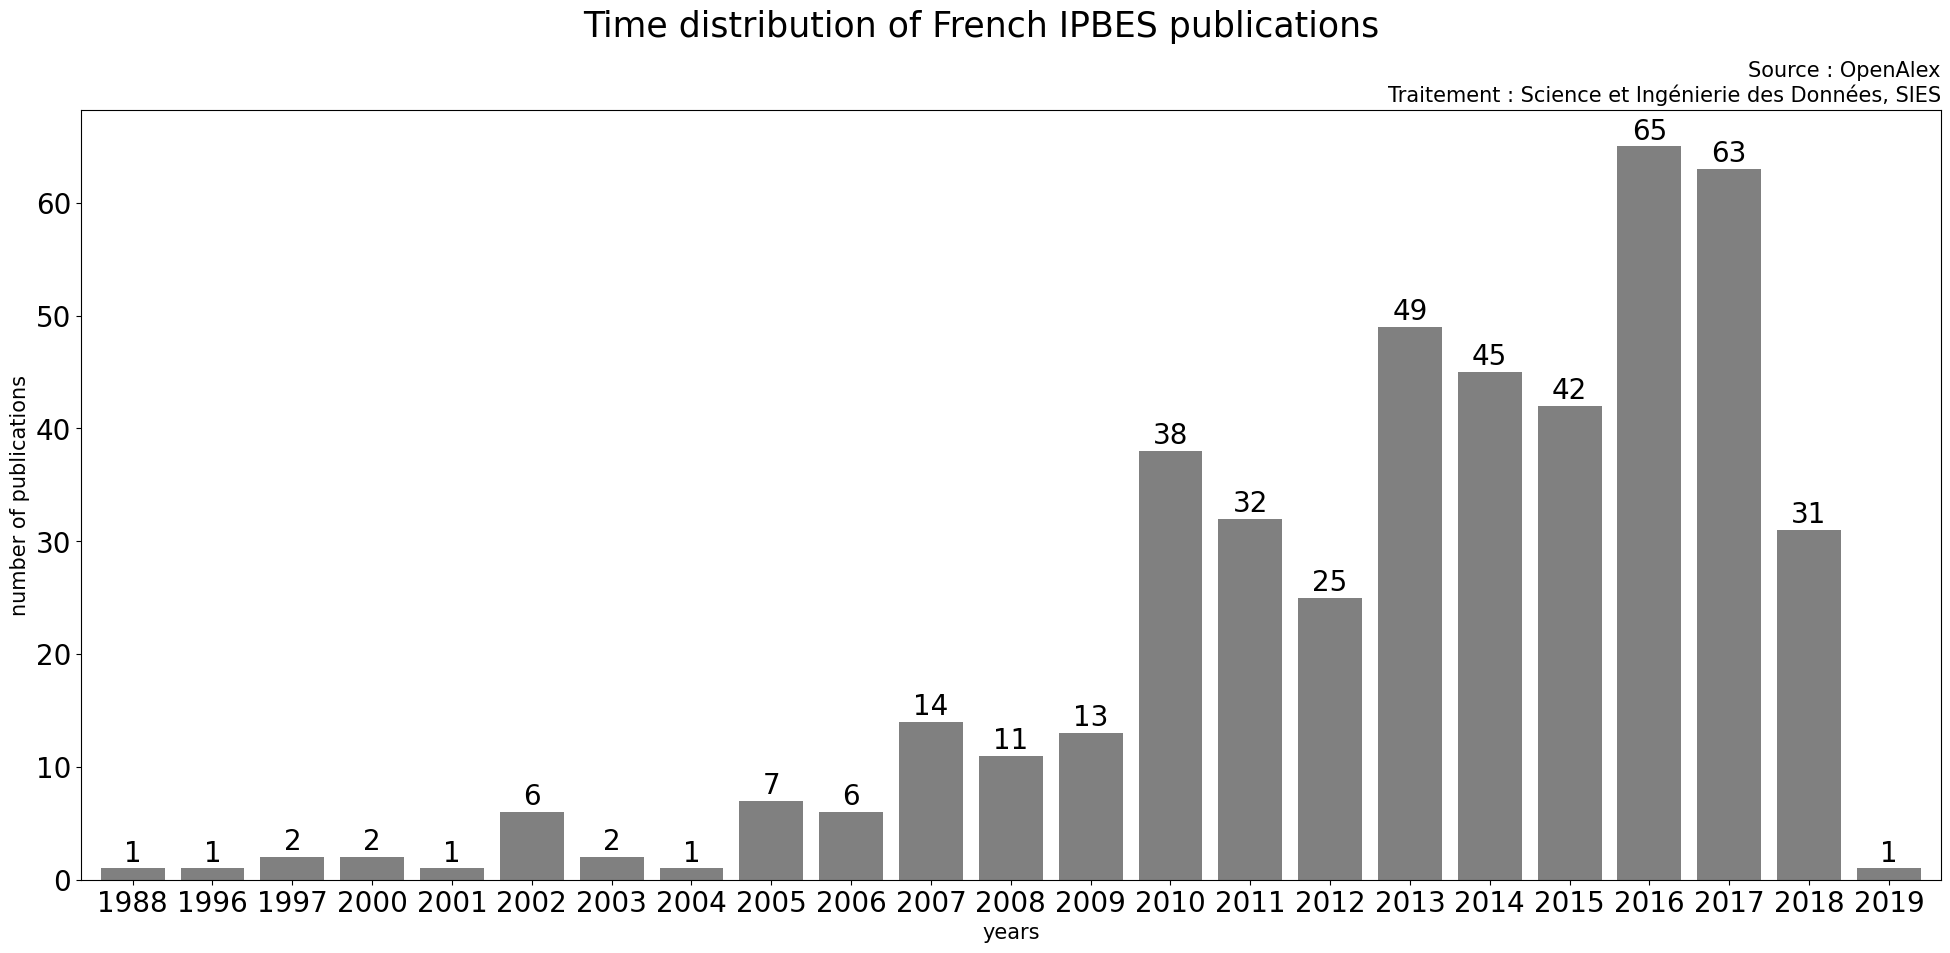

In [51]:
import matplotlib.pyplot as plt

data_counts=pd.Series([int(x) for x in list(df_ipbes_fr.year.dropna())]).value_counts()
data_counts=pd.Series(dict(data_counts)).sort_index()
plt.figure(figsize=(24, 10))
color_dict = {
'FR': '#BE2125'
}
ax = data_counts.plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts.index], width=0.8)

for i, v in enumerate(data_counts):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle(f"Time distribution of French IPBES publications", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

ax.set_xticklabels(data_counts.index, rotation='horizontal', fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_ylabel(f'number of publications', fontsize=15)
ax.set_xlabel(f'years', fontsize=15)
plt.show()

In [52]:
pd.Series([int(x) for x in list(df_ipbes_fr.year.dropna())]).value_counts().sum()

458

top persons

In [59]:
persons_fr=[x[0] for x in aplatir(list(df_ipcc.authors_name.dropna())) if 'FR' in x[1]]

In [60]:
pd.Series(persons_fr).value_counts()

Philippe Ciais         191
Laurent Bopp            75
Robert Vautard          71
Oliviér Boucher         60
Roland Séférian         42
                      ... 
Laure Vidal-Beaudet      1
Gilles Hunault           1
Patrice Cannavo          1
François Nold            1
Jean-Marc Millot         1
Name: count, Length: 4853, dtype: int64

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\1140375592.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)


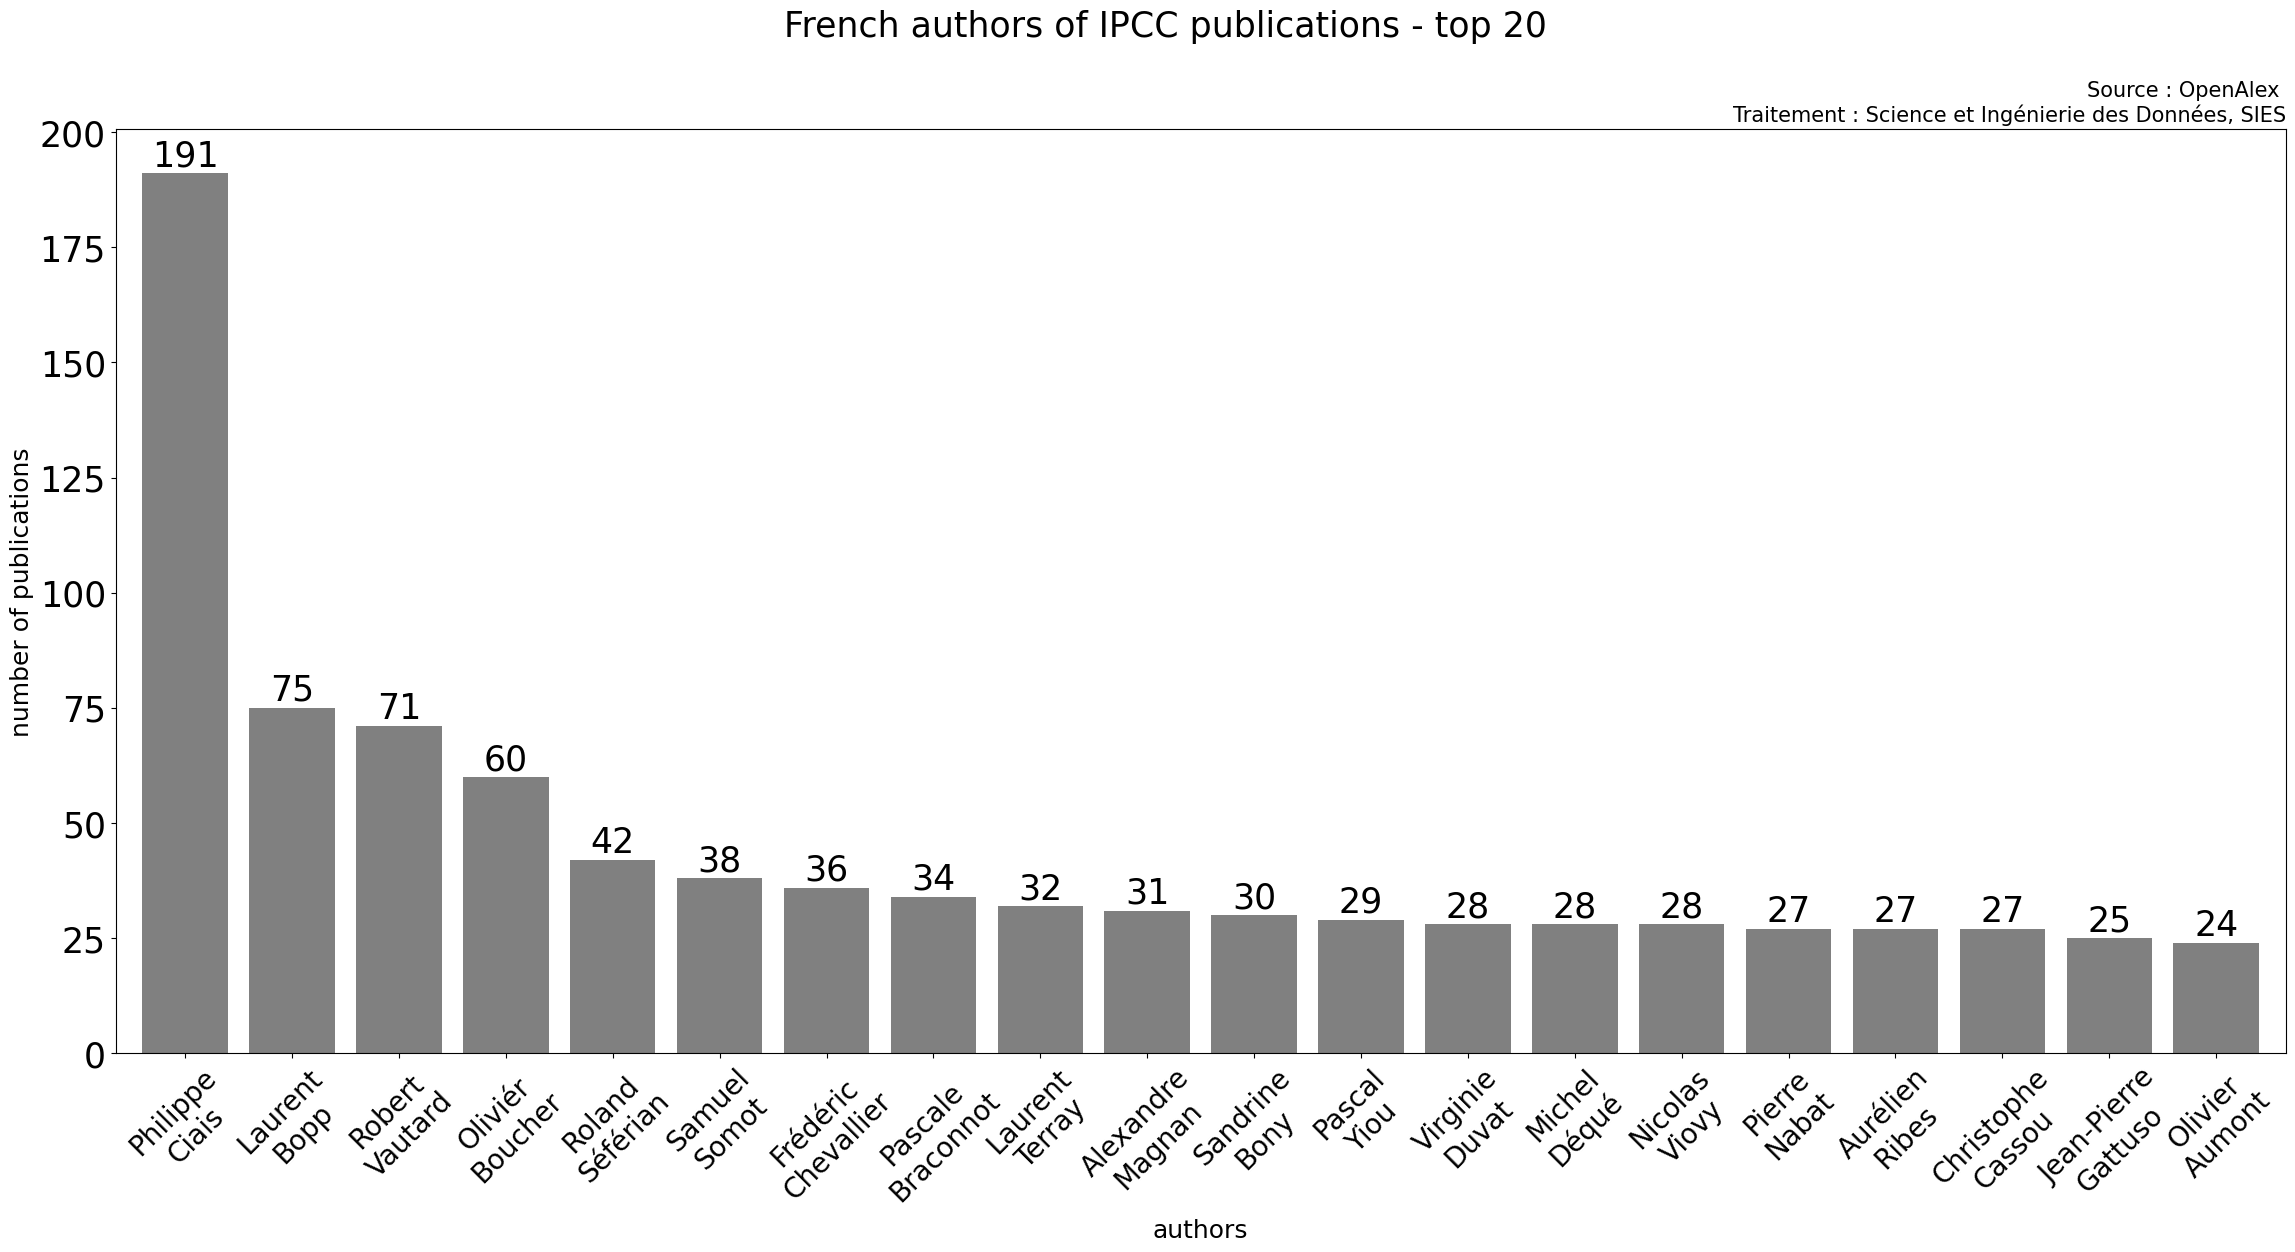

In [61]:
import matplotlib.pyplot as plt

data_counts=pd.Series(persons_fr).value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("French authors of IPCC publications - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

xticklabels = [label.split(' ', 1)[0]+'\n'+label.split(' ', 1)[1] for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation=45, fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xlabel(f'authors', fontsize=18)
ax.set_ylabel(f'number of publications', fontsize=18)
plt.show()

In [62]:
persons_fr=[x[0] for x in aplatir(list(df_ipbes.authors_name.dropna())) if 'FR' in x[1]]

C:\Users\haallat\AppData\Local\Temp\ipykernel_15348\3121019520.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)


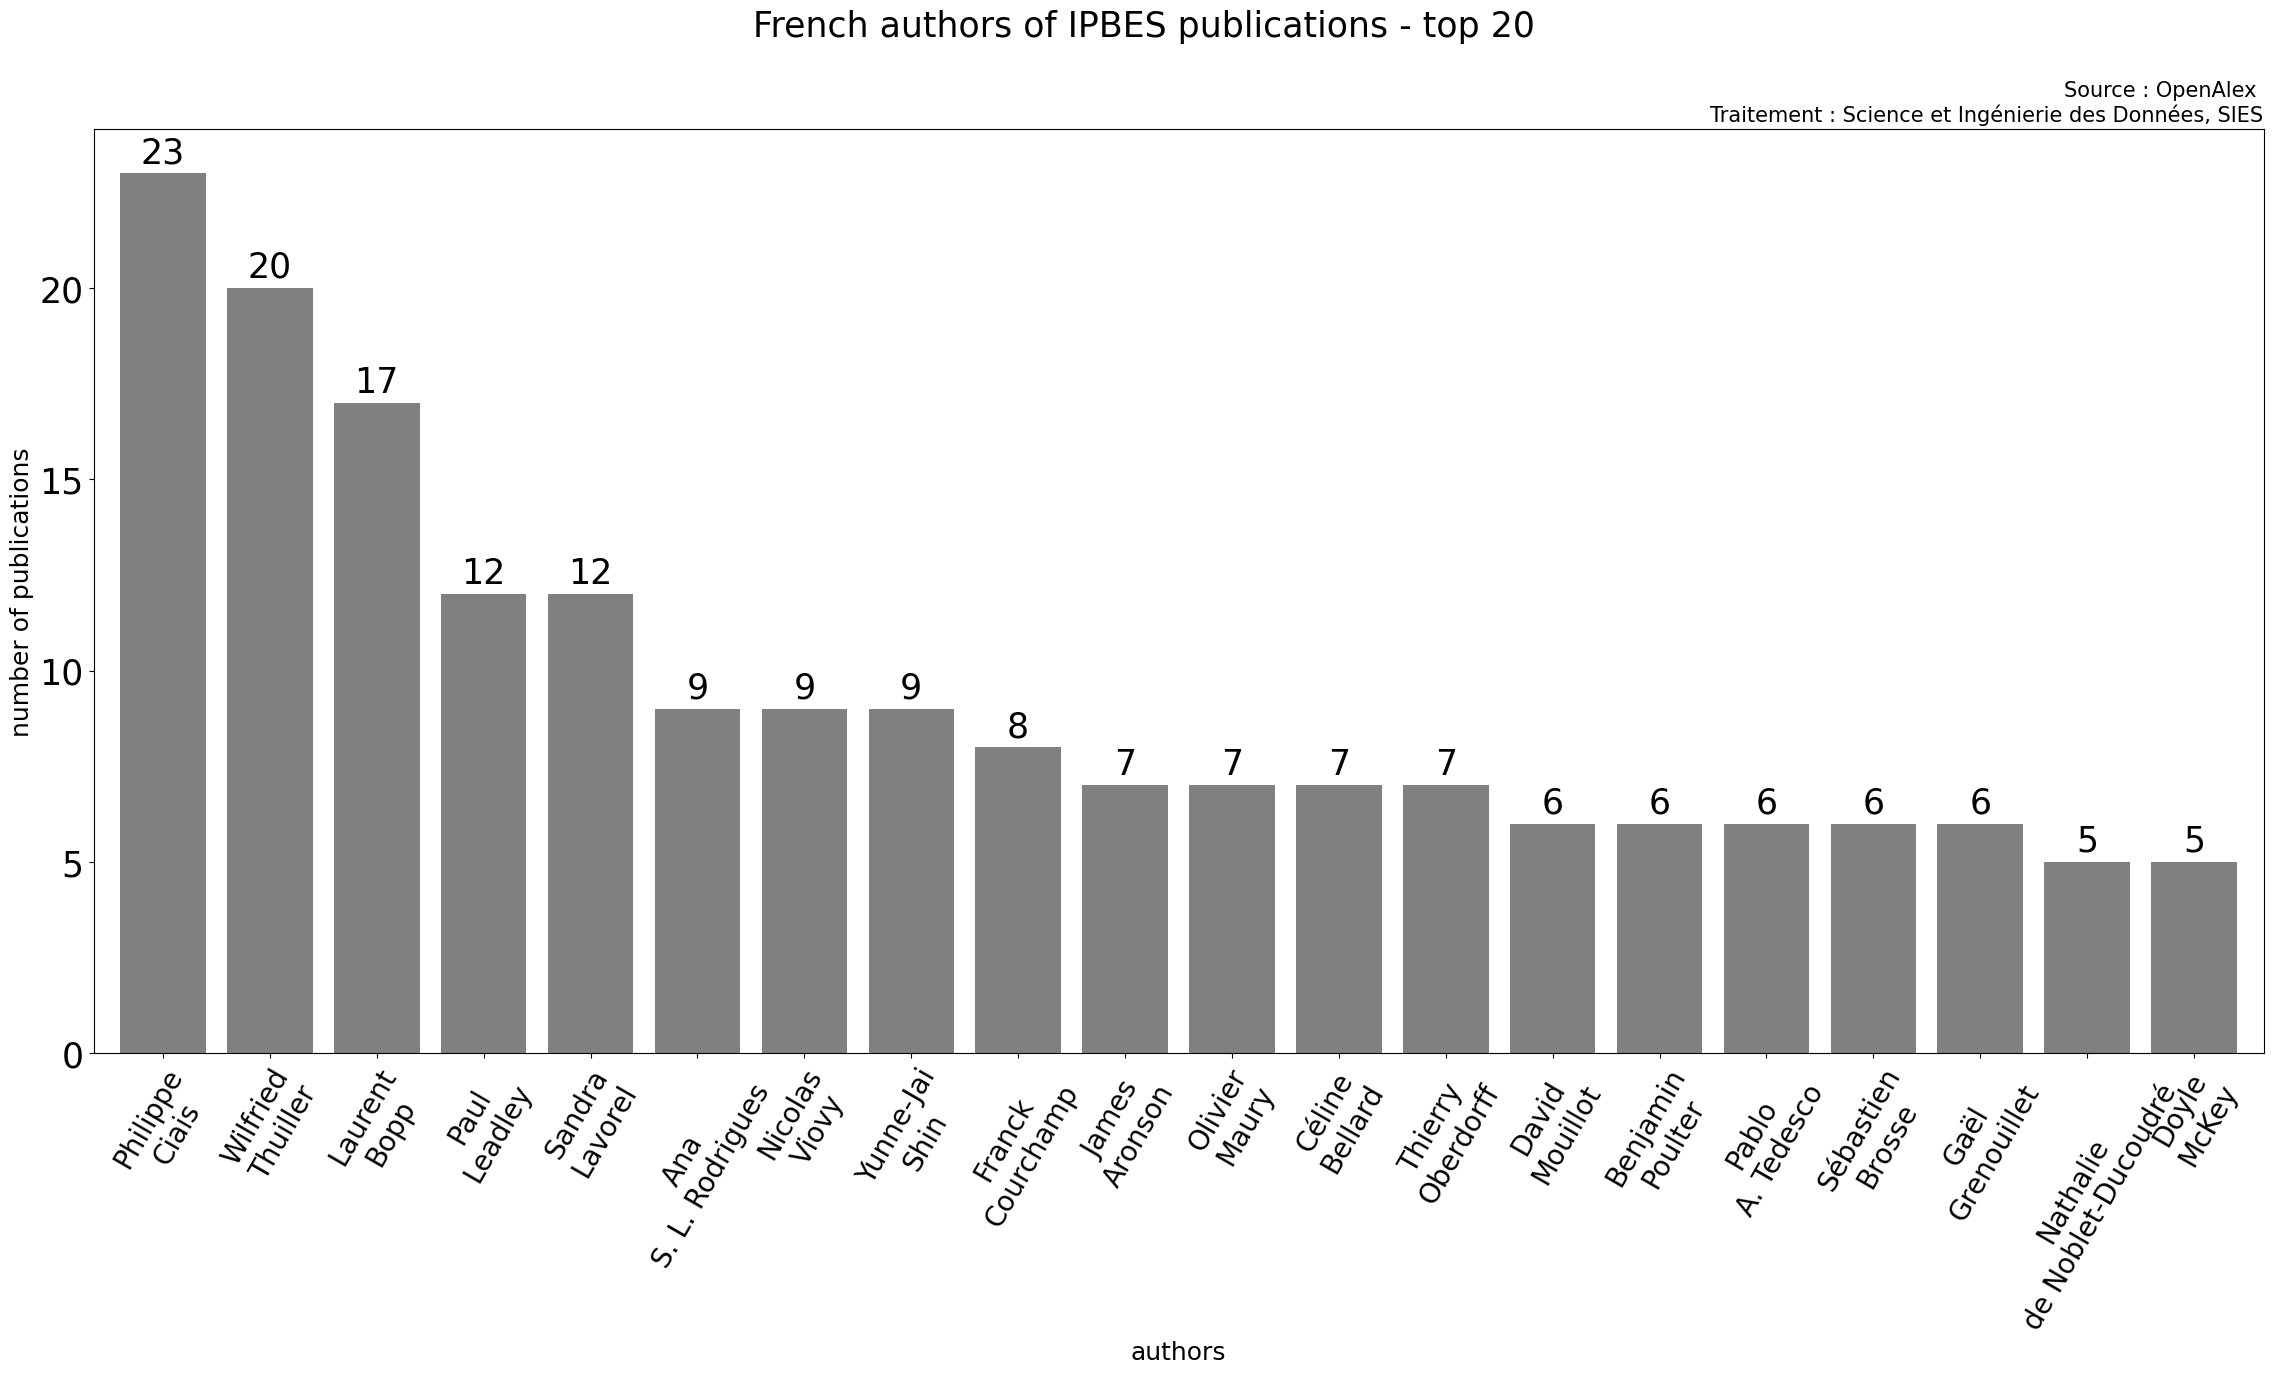

In [63]:
import matplotlib.pyplot as plt

data_counts=pd.Series(persons_fr).value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("French authors of IPBES publications - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

xticklabels = [label.split(' ', 1)[0]+'\n'+label.split(' ', 1)[1] for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation=60, fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xlabel(f'authors', fontsize=18)
ax.set_ylabel(f'number of publications', fontsize=18)
plt.show()

top labo

In [113]:
rors_labo_et_institutions=[x[0] for x in aplatir(list(df_ipcc.rors.dropna())) if x[1]=='FR']

In [114]:
struct_paysage=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\fr_esr_paysage_structures_all.json')
ror_rnsr_paysage=struct_paysage[['uo_lib','element_ror','identifiant_rnsr']].dropna(subset=['identifiant_rnsr']).rename(columns={'element_ror':'ror'})

In [115]:
ipcc_labo=pd.merge(pd.DataFrame(data={'ror':rors_labo_et_institutions}),ror_rnsr_paysage,how='inner',on='ror')

In [116]:
dict_ipcc_labs={"Laboratoire des sciences du climat et de l'environnement":'LSCE - UMR8212',
 "Laboratoire d'océanographie et du climat : expérimentations et approches numériques":'LOCEAN - UMR7159',
 "Institut des géosciences de l'environnement":'IGE - UMR5001',
 "Centre national de recherches météorologiques":'CNRM - UMR3589',
 "Laboratoire de météorologie dynamique":'LMD - UMR8539',
 "Centre International de Recherche sur l'Environnement et le Développement": 'CIRED - UMR8568',
 "Laboratoire d'études en géophysique et océanographie spatiales": 'LEGOS - UMR5566',
 "Centre européen de recherche et de formation avancée en calcul scientifique":'CERFACS - UMR5318',
 "Centre d'écologie fonctionnelle et évolutive":'CEFE - UMR5175',
 "Centre pour la biodiversité marine, l'exploitation et la conservation":'MARBEC - UMR9190/UMR248',
 "Laboratoire inter-universitaire des systèmes atmosphériques":'LISA - UMR7583',
 "Institut Universitaire Européen de la Mer":'IUEM - UMR 6539',
 "Écologie, systématique et évolution":'ESE - UMR8079',
 "Environnements et paléoenvironnements océaniques et continentaux":'EPOC - UMR5805',
 "Centre d'études spatiales de la biosphère":'CESBIO - UMR5126',
 "Laboratoire d'aérologie":"LAERO - UMR5560"
 }

In [117]:
colors={
"Laboratoire des sciences du climat et de l'environnement": "#BE2125",
"Laboratoire d'océanographie et du climat : expérimentations et approches numériques": "#BE2125",
"Institut des géosciences de l'environnement": "#8B4513",
"Centre national de recherches météorologiques": "#32CD32",
"Laboratoire de météorologie dynamique": "#BE2125",
"Centre International de Recherche sur l'Environnement et le Développement": "#BE2125",
"Laboratoire d'études en géophysique et océanographie spatiales": "#32CD32",
"Centre européen de recherche et de formation avancée en calcul scientifique": "#32CD32",
"Centre d'écologie fonctionnelle et évolutive": "#32CD32",
"Centre pour la biodiversité marine, l'exploitation et la conservation": "#32CD32",
"Laboratoire inter-universitaire des systèmes atmosphériques": "#BE2125",
"Institut Universitaire Européen de la Mer": "#4169E1",
"Écologie, systématique et évolution": "#BE2125",
"Environnements et paléoenvironnements océaniques et continentaux": "#808080",
"Centre d'études spatiales de la biosphère": "#32CD32",
"Biologie des organismes et écosystèmes aquatiques":'#BE2125',
"Laboratoire d'écologie alpine": "#8B4513",
"Évolution et diversité biologique": "#32CD32",
"Institut méditerranéen de biodiversité et d'écologie marine et continentale": "#FFFF00",
"Maladies infectieuses et vecteurs : écologie, Génétique, évolution et contrôle": "#32CD32",
"Institut des sciences de l'évolution de Montpellier": '#32CD32',
"Centre d'études biologiques de Chizé":"#808080",
'Agroécologie':'orange',
"Institut de biologie de l'école normale supérieure":'#BE2125',
"Laboratoire d'aérologie":'#32CD32'
}

In [118]:
regions_colors= {
    "Île-de-France": "#BE2125",
    "Auvergne-Rhône-Alpes": "#8B4513",
    "Occitanie": "#32CD32",
    "Provence-Alpes-Côte d'Azur": "#FFFF00",
    "Bretagne": "#4169E1",
    "Nouvelle-Aquitaine": "#808080",
    "Bourgogne-Franche-Comté":'orange'
}

In [27]:
pd.Series(aplatir(list(df_ipcc.loc[:,'french_labs'][df_ipcc.loc[:,'french_labs'].apply(lambda x: x!=[])]))).value_counts()

Laboratoire des sciences du climat et de l'environnement                               1396
Centre national de recherches météorologiques                                           361
Laboratoire d'océanographie et du climat : expérimentations et approches numériques     350
Institut des géosciences de l'environnement                                             321
Laboratoire de météorologie dynamique                                                   308
                                                                                       ... 
Laboratoire Navier                                                                        1
Laboratoire de mécanique des fluides et d'acoustique                                      1
Laboratoire de cristallographie et sciences des matériaux                                 1
Laboratoire d'informatique de l'école polytechnique                                       1
Institut Jean le Rond d’Alembert                                                

C:\Users\haallat\AppData\Local\Temp\ipykernel_2576\18110936.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)


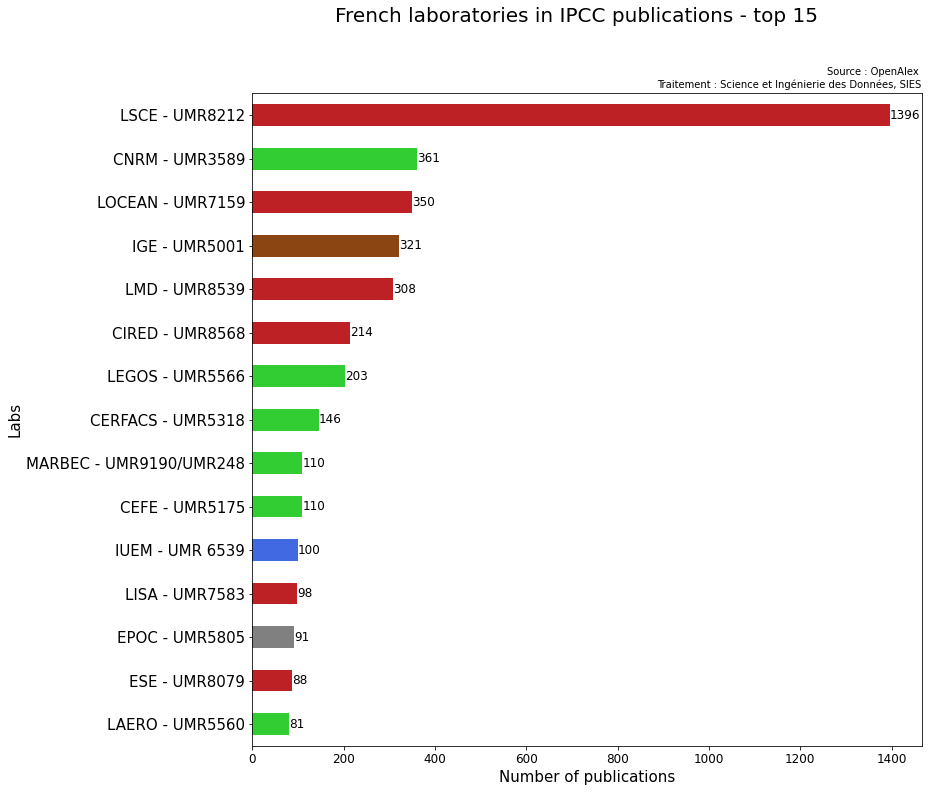

In [119]:
import matplotlib.pyplot as plt

data_counts = ipcc_labo.uo_lib.value_counts()
plt.figure(figsize=(12, 12))  
ax = data_counts[:15].plot(kind='barh', color=[colors.get(u, 'grey') for u in data_counts[:15].index])  

for i, v in enumerate(data_counts[:15]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=12)  

plt.suptitle("French laboratories in IPCC publications - top 15", size=20)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

yticklabels = [dict_ipcc_labs[label] for label in data_counts.index[:15]]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Number of publications', fontsize=15)  
ax.set_ylabel('Labs', fontsize=15)  
plt.gca().invert_yaxis()  
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_2576\880658697.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)


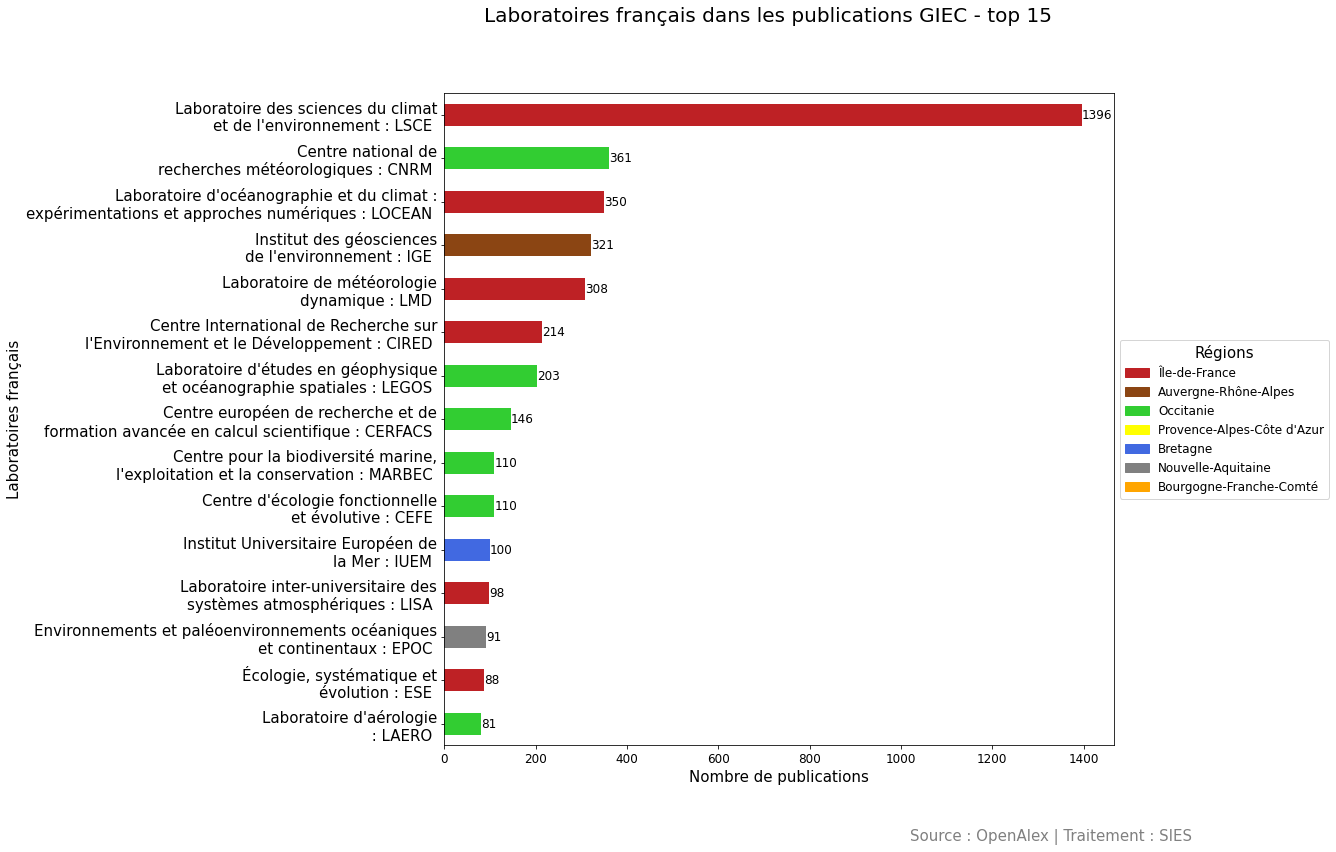

In [ ]:
import matplotlib.pyplot as plt

data_counts = ipcc_labo.uo_lib.value_counts()
plt.figure(figsize=(12, 12))  
ax = data_counts[:15].plot(kind='barh', color=[colors.get(u, 'grey') for u in data_counts[:15].index])  
fig = plt.gcf()

for i, v in enumerate(data_counts[:15]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=12)  

plt.suptitle("Laboratoires français dans les publications GIEC - top 15", size=20)
fig.text(0.99, 0.01, "Source : OpenAlex | Traitement : SIES", ha='right', va='bottom', fontsize=15, color='gray')

yticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) +' : '+dict_ipcc_labs[label].split('-')[0] for label in data_counts.index[:15]]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Nombre de publications', fontsize=15)  
ax.set_ylabel('Laboratoires français', fontsize=15)  

legend_handles = []
for region, color in regions_colors.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=region))
plt.legend(handles=legend_handles, title='Régions', title_fontsize='15', fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

plt.gca().invert_yaxis()  
plt.show()

In [97]:
rors_labo_et_institutions=rors_labo_et_institutions=[x[0] for x in aplatir(list(df_ipbes.rors.dropna())) if x[1]=='FR']

struct_paysage=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\fr_esr_paysage_structures_all.json')
ror_rnsr_paysage=struct_paysage[['uo_lib','element_ror','identifiant_rnsr']].dropna(subset=['identifiant_rnsr']).rename(columns={'element_ror':'ror'})

NameError: name 'df_ipbes' is not defined

In [93]:
ipbes_labo=pd.merge(pd.DataFrame(data={'ror':rors_labo_et_institutions}),ror_rnsr_paysage,how='inner',on='ror')

In [94]:
dict_ipbes_labs={
"Laboratoire des sciences du climat et de l'environnement": "LSCE - UMR8212",
"Écologie, systématique et évolution": "ESE - UMR8079",
"Laboratoire d'océanographie et du climat : expérimentations et approches numériques": "LOCEAN - UMR7159",
"Centre pour la biodiversité marine, l'exploitation et la conservation": "MARBEC - UMR9190/UMR248",
"Centre d'écologie fonctionnelle et évolutive": "CEFE - UMR5175",
"Biologie des organismes et écosystèmes aquatiques": "BOREA - UMR8067",
"Laboratoire d'écologie alpine": "LECA - UMR5553",
"Laboratoire d'études en géophysique et océanographie spatiales": "LEGOS - UMR5566",
"Évolution et diversité biologique": "EDB - UMR5174",
"Institut des sciences de l'évolution de Montpellier": "ISEM - UMR5554",
"Centre International de Recherche sur l'Environnement et le Développement": "CIRED - UMR8568",
"Centre national de recherches météorologiques": "CNRM - UMR3589",
"Institut méditerranéen de biodiversité et d'écologie marine et continentale": "IMBE - UMR7263",
"Centre européen de recherche et de formation avancée en calcul scientifique": "CERFACS - UMR5318",
"Maladies infectieuses et vecteurs : écologie, Génétique, évolution et contrôle": "MIVEGEC - UMR224",
"Centre d'études biologiques de Chizé":"CEBC - UMR7372",
"Institut de biologie de l'école normale supérieure":'IBENS - UMR8197',
'Agroécologie':''
}

In [95]:
regions_colors= {
    "Île-de-France": "#BE2125",
    "Auvergne-Rhône-Alpes": "#8B4513",
    "Occitanie": "#32CD32",
    "Provence-Alpes-Côte d'Azur": "#FFFF00",
    "Bretagne": "#4169E1",
    "Nouvelle-Aquitaine": "#808080",
    "Bourgogne-Franche-Comté":'orange'
}

In [142]:
import matplotlib.pyplot as plt

data_counts = ipbes_labo.uo_lib.value_counts()
plt.figure(figsize=(12, 12))  
ax = data_counts[:15].plot(kind='barh', color=[colors.get(u, 'grey') for u in data_counts[:15].index])  
fig = plt.gcf()

for i, v in enumerate(data_counts[:15]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=12)  

plt.suptitle("French laboratories in IPBES publications - top 15", size=20)
fig.text(0.01, 0.01, "Source : OpenAlex | Traitement : Science et Ingénierie des Données, SIES", ha='left', fontsize=15, color='gray')

yticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) +' '+dict_ipbes_labs[label].split('-')[0] for label in data_counts.index[:15] ]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Number of publications', fontsize=15)  
ax.set_ylabel('Labs', fontsize=15)  

legend_handles = []
for region, color in regions_colors.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=region))
plt.legend(handles=legend_handles, title='Regions', title_fontsize='15', fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

plt.gca().invert_yaxis()  
plt.show()

NameError: name 'ipbes_labo' is not defined

top institutions

In [126]:
ror_rnsr_paysage=struct_paysage[['element_ror','identifiant_rnsr']].dropna(subset=['identifiant_rnsr']).rename(columns={'element_ror':'ror'})
ror_rnsr_paysage.loc[:,'ror']=ror_rnsr_paysage.loc[:,'ror'].apply(lambda x: str(x).replace('https://ror.org/','') if pd.isna(x)==False else None)

In [127]:
df_rnsr=pd.merge(pd.DataFrame(data={'ror':[str(x).replace('https://ror.org/','') for x in rors_labo_et_institutions]}),ror_rnsr_paysage.dropna(subset=['ror']).rename(columns={'identifiant_rnsr':'rnsr'}), on='ror', how='left')

In [128]:
rnsr_tutelles_scanr=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\organizations.jsonl', lines=True)
rnsr_tutelles_scanr['tutelles_label']=rnsr_tutelles_scanr['institutions'].apply(lambda x: [y.get('label') for y in x] if len(x)>0 else None)
rnsr_tutelles_scanr['tutelles_id']=rnsr_tutelles_scanr['institutions'].apply(lambda x: [y.get('structure') for y in x] if len(x)>0 else None)
rnsr_tutelles_scanr.loc[:,'ror']=rnsr_tutelles_scanr.loc[:,'externalIds'].apply(lambda y: [x.get('id') for x in y if x.get('type')=='ROR'])
rnsr_tutelles_scanr.loc[:,'rnsr']=rnsr_tutelles_scanr.loc[:,'externalIds'].apply(lambda y: [x.get('id') for x in y if x.get('type')=='rnsr'])
rnsr_tutelles=rnsr_tutelles_scanr[['id','tutelles_label']].rename(columns={'id':'rnsr'})
ror_tutelles=rnsr_tutelles_scanr[['ror','tutelles_label']].explode('ror')

In [129]:
rnsr_tutelles_scanr.columns

Index(['id', 'startDate', 'creationYear', 'endDate', 'status', 'label',
       'acronym', 'kind', 'level', 'legalCategory', 'description',
       'employeesInfo', 'nature', 'isFrench', 'address', 'alias', 'phone',
       'email', 'badges', 'focus', 'evaluations', 'parents', 'leaders',
       'institutions', 'predecessors', 'spinoffs', 'relations', 'socialMedias',
       'links', 'externalIds', 'keywords', 'activities', 'createdAt',
       'removedAt', 'tutelles_label', 'tutelles_id', 'ror', 'rnsr'],
      dtype='object')

In [130]:
rnsr_tutelles[['rnsr','tutelles_label']].dropna(subset=['rnsr'])

,rnsr,tutelles_label
0,200012318,None
1,200034528,None
2,200035335,None
3,200046977,None
4,226400018,None
...,...,...
73009,202424495A,[Institut National des Sciences Appliquées Tou...
73010,202424497C,"[Université La Rochelle, Centre national de la..."
73011,202424503J,"[Université de Tours, Institut national de la ..."
73012,202424515X,[Université de Lorraine]


In [131]:
ror_tutelles[['ror','tutelles_label']].dropna(subset=['ror'])

,ror,tutelles_label
32,01875pg84,None
34,02mqtne57,None
427,00t9y0z13,[Centre national de la recherche scientifique]
489,02d4qpq05,None
649,00qkwk946,None
...,...,...
65083,05x9zmx47,"[Centre national de la recherche scientifique,..."
65196,040shjw10,None
66964,0075rng13,None
67020,032v67m28,"[Université Littoral-Côte d'Opale, Université ..."


In [132]:
df_test=pd.merge(df_rnsr,ror_tutelles.rename(columns={'tutelles_label':'tutelles_ror'}).dropna(subset=['ror']), on='ror', how='left')
df_test2=pd.merge(df_test,rnsr_tutelles.rename(columns={'tutelles_label':'tutelles_rnsr'}).dropna(subset=['rnsr']), on='rnsr', how='left')

In [133]:
def get_tutelles(row):
    if isinstance(row['tutelles_ror'],list) and len(row['tutelles_ror'])>0:
        return row['tutelles_ror']
    elif isinstance(row['tutelles_rnsr'],list) and len(row['tutelles_rnsr'])>0:
        return row['tutelles_rnsr']
    else:
        return None

In [134]:
df_test2['tutelles']=df_test2.apply(lambda row: get_tutelles(row), axis=1)

In [135]:
df_test3=df_test2.explode('tutelles')

In [136]:
df_test3.tutelles.value_counts()[:15]

tutelles
Centre national de la recherche scientifique                                            5271
Institut de recherche pour le developpement                                             1986
Université Paris-Saclay                                                                 1715
Commissariat à l'énergie atomique et aux énergies alternatives                          1400
Université Versailles Saint-Quentin-en-Yvelines                                         1397
Institut national de recherche pour l'agriculture, l'alimentation et l'environnement     867
Sorbonne Université                                                                      831
Université Paris sciences et lettres                                                     701
Météo France                                                                             663
Université Toulouse 3 - Paul Sabatier                                                    636
Ecole Nationale Supérieure Météorologie Toulouse             

In [137]:
dict_ipcc_inst={
    "Centre national de la recherche scientifique": "CNRS",
    "Université Paris-Saclay": "",
    "Université Versailles Saint-Quentin-en-Yvelines": "UVSQ",
    "Commissariat à l'énergie atomique et aux énergies alternatives": "CEA",
    "Institut de recherche pour le developpement": "IRD",
    "Université de Montpellier (EPE)": "",
    "Institut national de recherche pour l'agriculture, l'alimentation et l'environnement": "INRAE",
    "Sorbonne Université": "",
    "AgroParisTech (Inst Sc et Ind du Vivant et Environnement)": "",
    "Muséum National d'Histoire Naturelle Paris": "MNHN",
    "Université Paris sciences et lettres": "PSL",
    "Université Toulouse 3 - Paul Sabatier": "UPS",
    "Ecole Pratique des Hautes Etudes Paris": "EPHE",
    "Institut Francais de Recherche pour l'Exploitation de la Mer": "IFREMER",
    "Université Grenoble Alpes": "UGA",
    'Météo France':'',
    "Centre National d'Etude Spatiales":"CNES",
    'Ecole Nationale Supérieure Météorologie Toulouse':'ENM',
    'Ecole des Ponts ParisTech':'ENPC',
    "Institut national d'enseignement supérieur pour l'agriculture, l'alimentation et l'environnement":"",
    'Université Paul Valéry Montpellier 3':'',
    'Université Savoie Chambéry': ""
}

In [138]:
colors = {
    "Centre national de la recherche scientifique": "#05445E",
    "Institut de recherche pour le developpement": "#05445E",
    "Université Paris-Saclay": "#BE2125",  
    "Université Versailles Saint-Quentin-en-Yvelines": "#BE2125",
    "Commissariat à l'énergie atomique et aux énergies alternatives": "#05445E",
    "Sorbonne Université": "#BE2125",  
    "Institut national de recherche pour l'agriculture, l'alimentation et l'environnement": "#05445E",
    "Institut national d'enseignement supérieur pour l'agriculture, l'alimentation et l'environnement":"#05445E",
    "Université Toulouse 3 - Paul Sabatier": "#32CD32",
    "Muséum National d'Histoire Naturelle Paris": "#BE2125",
    "Université Grenoble Alpes": "#8B4513",
    "Université de Montpellier (EPE)": "#32CD32",
    "AgroParisTech (Inst Sc et Ind du Vivant et Environnement)": "#BE2125",
    "Université Paris sciences et lettres": "#BE2125",
    "Ecole Pratique des Hautes Etudes Paris": "#BE2125",
    "Institut Francais de Recherche pour l'Exploitation de la Mer": "#4169E1",
    'Météo France':'#32CD32',
    "Centre National d'Etude Spatiales":'#32CD32',
    'Ecole Nationale Supérieure Météorologie Toulouse':'#32CD32',
    'Ecole des Ponts ParisTech':'#BE2125',
    'Université Paul Valéry Montpellier 3':'#32CD32',
    'Université Savoie Chambéry': "#8B4513"
}

In [139]:
regions_colors= {
    "Organismes nationaux": "#05445E",
    "Île-de-France": "#BE2125",
    "Auvergne-Rhône-Alpes": "#8B4513",
    "Occitanie": "#32CD32",
    "Provence-Alpes-Côte d'Azur": "#FFFF00",
    "Bretagne": "#4169E1",
    "Nouvelle-Aquitaine": "#808080",
    "Bourgogne-Franche-Comté":'orange'
}

C:\Users\haallat\AppData\Local\Temp\ipykernel_2576\1047568479.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)


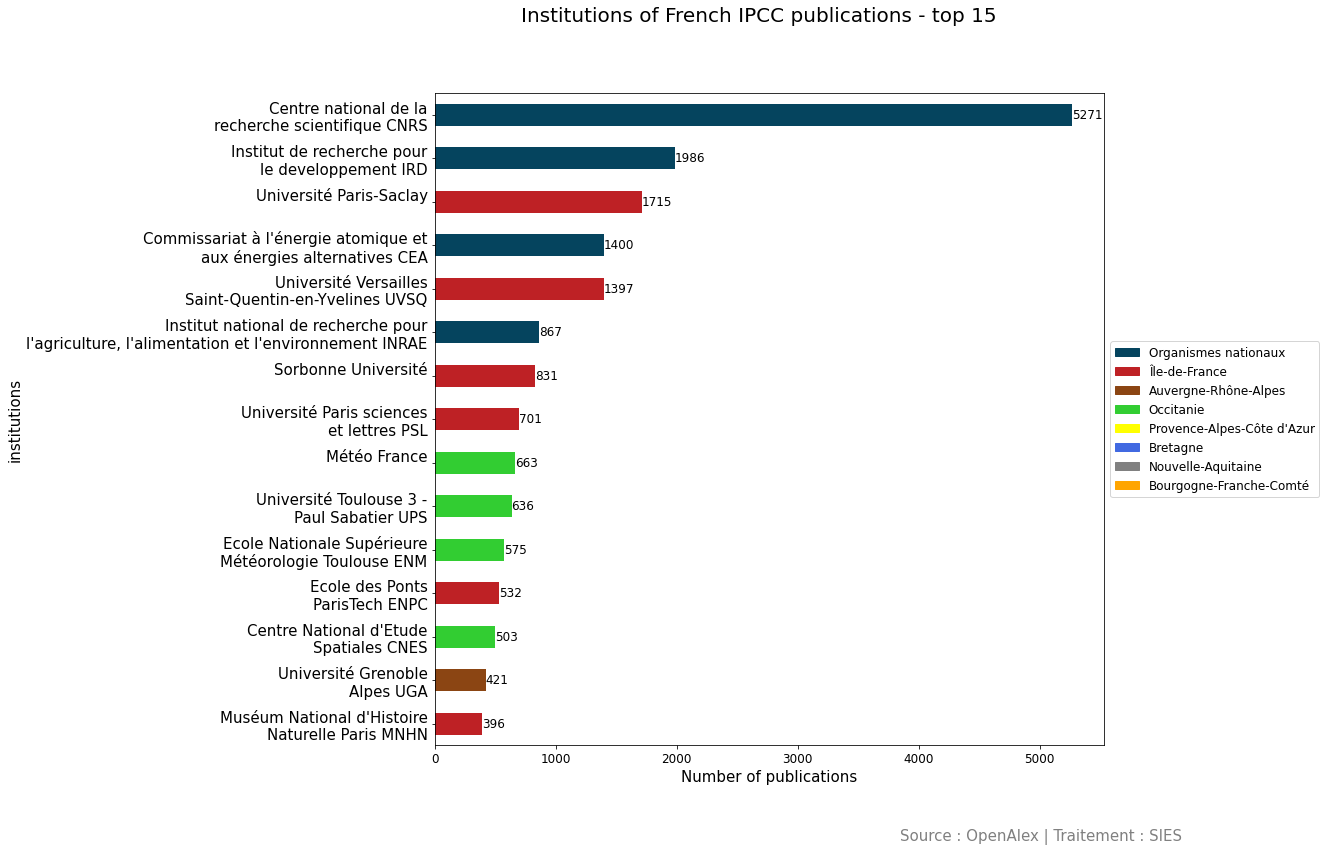

In [141]:
import matplotlib.pyplot as plt

data_counts=df_test3.tutelles.value_counts()
plt.figure(figsize=(12, 12))  
ax = data_counts[:15].plot(kind='barh', color=[colors.get(u, 'grey') for u in data_counts[:15].index])  

for i, v in enumerate(data_counts[:15]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=12)  

plt.suptitle("Institutions of French IPCC publications - top 15", size=20)
fig = plt.gcf()
fig.text(0.99, 0.01, "Source : OpenAlex | Traitement : SIES", ha='right', va='bottom', fontsize=15, color='gray')

yticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) +' '+dict_ipcc_inst[label].split('-')[0] for label in data_counts.index[:15]]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Number of publications', fontsize=15)  
ax.set_ylabel('institutions', fontsize=15)  

legend_handles = []
for region, color in regions_colors.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=region))
plt.legend(handles=legend_handles, title='', title_fontsize='15', fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

plt.gca().invert_yaxis()  
plt.show()